In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

In [2]:
import deap
import scipy
import pyswarm
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform

# Print library versions
print("DEAP version:", deap.__version__)
print("SciPy version:", scipy.__version__)
print("PySwarm version:", pyswarm.__version__)
print("scikit-learn version:", sklearn.__version__)
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)

# Print Jupyter Notebook version
print("Jupyter Notebook version:", platform.release())


DEAP version: 1.4
SciPy version: 1.7.3
PySwarm version: 0.6
scikit-learn version: 1.4.1.post1
NumPy version: 1.22.4
Pandas version: 1.4.4
Matplotlib version: 3.5.2
Jupyter Notebook version: 10


## Data Preprocessing

#### Understanding columns in the dataset 



Details taken from kaggle dataset card 

- Age : 
Age Of Customer

- Diabetes : 
Whether The Person Has Abnormal BloodSugar Levels

- BloodPressureProblems : 
Whether The Person Has Abnormal Blood Pressure Levels

- AnyTransplants : 
Any Major Organ Transplants

- AnyChronicDiseases : 
Whether Customer Suffers From Chronic Ailments Like Asthama, Etc.

- Height : 
Height Of Customer

- Weight : 
Weight Of Customer

- KnownAllergies : 
Whether The Customer Has Any Known Allergies

- HistoryOfCancerInFamily : 
Whether Any Blood Relative Of The Customer Has Had Any Form Of Cancer

- NumberOfMajorSurgeries : 
The Number Of Major Surgeries That The Person Has Had

- PremiumPrice : 
Yearly Premium Price

In [3]:
# Load medical premium dataset
health_df = pd.read_csv("Medicalpremium.csv")

In [4]:
health_df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [5]:
health_df.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


In [6]:
health_df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [7]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


## Data Visualization

## Univariate Analysis 

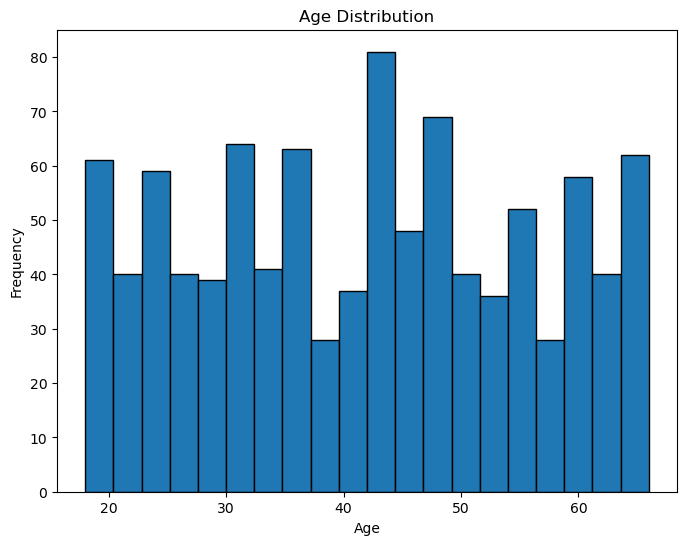

In [8]:
# Histogram of age distribution
plt.figure(figsize=(8, 6))
plt.hist(health_df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

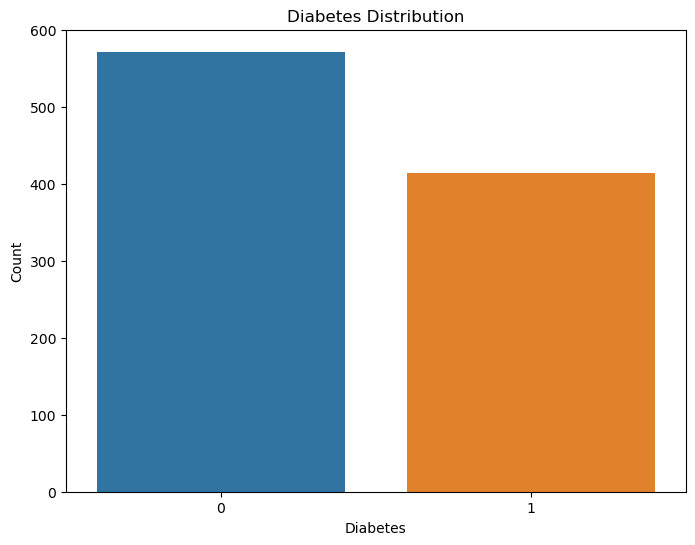

In [9]:
# Histogram of diabetes distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=health_df, x='Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Distribution')
plt.show()

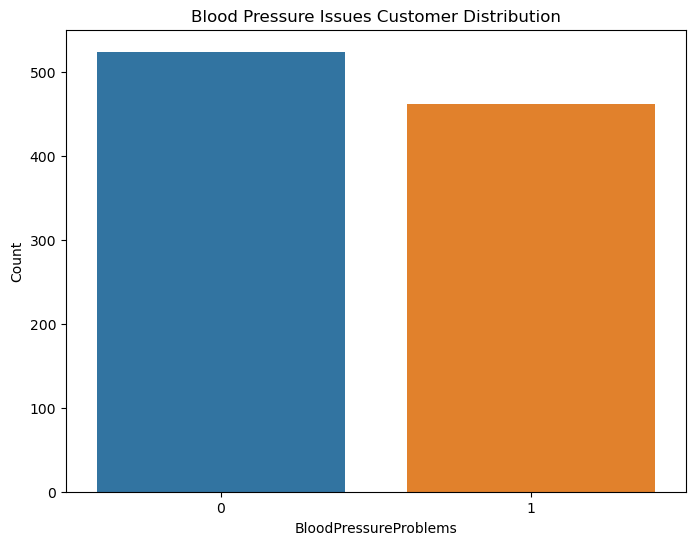

In [10]:
# Histogram of blood pressure issues distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=health_df, x='BloodPressureProblems')
plt.xlabel('BloodPressureProblems')
plt.ylabel('Count')
plt.title('Blood Pressure Issues Customer Distribution')
plt.show()

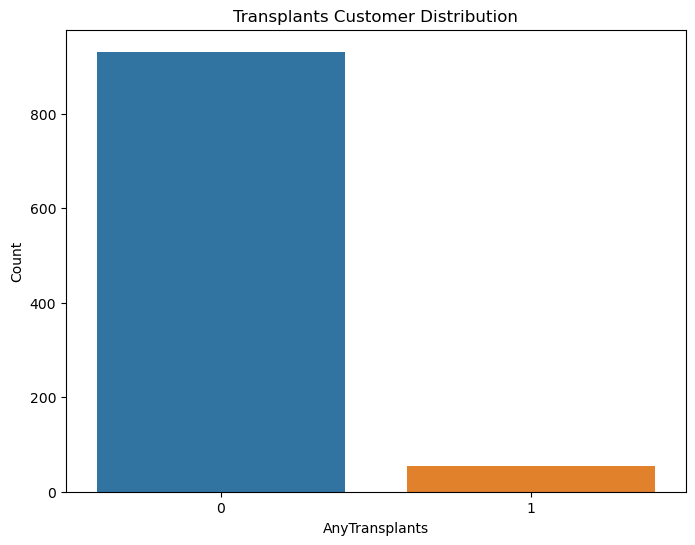

In [11]:
# Histogram of Transplants distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=health_df, x='AnyTransplants')
plt.xlabel('AnyTransplants')
plt.ylabel('Count')
plt.title('Transplants Customer Distribution')
plt.show()

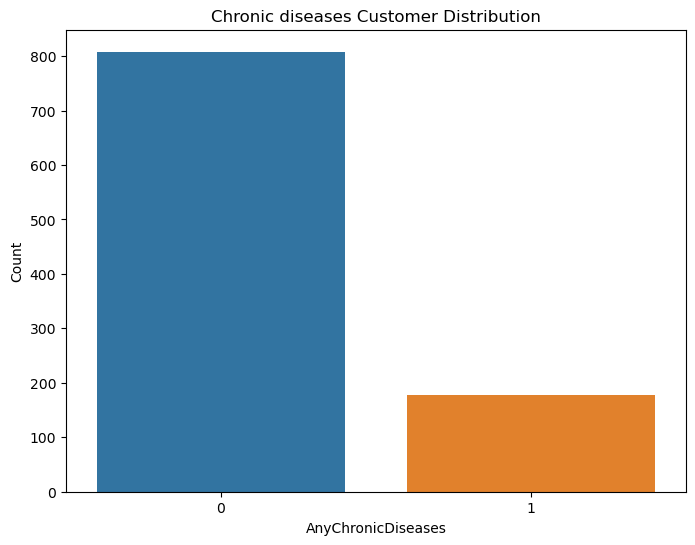

In [12]:
# Histogram of Chronic diseases distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=health_df, x='AnyChronicDiseases')
plt.xlabel('AnyChronicDiseases')
plt.ylabel('Count')
plt.title('Chronic diseases Customer Distribution')
plt.show()

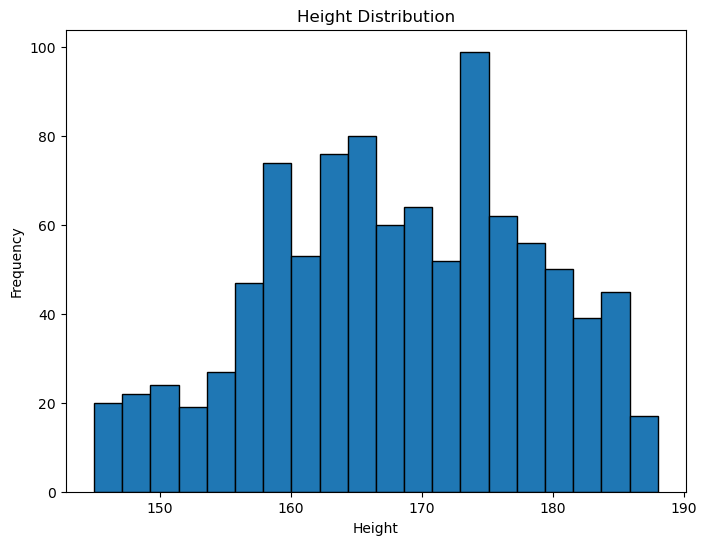

In [13]:
# Histogram of height distribution
plt.figure(figsize=(8, 6))
plt.hist(health_df['Height'], bins=20, edgecolor='black')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Height Distribution')
plt.show()

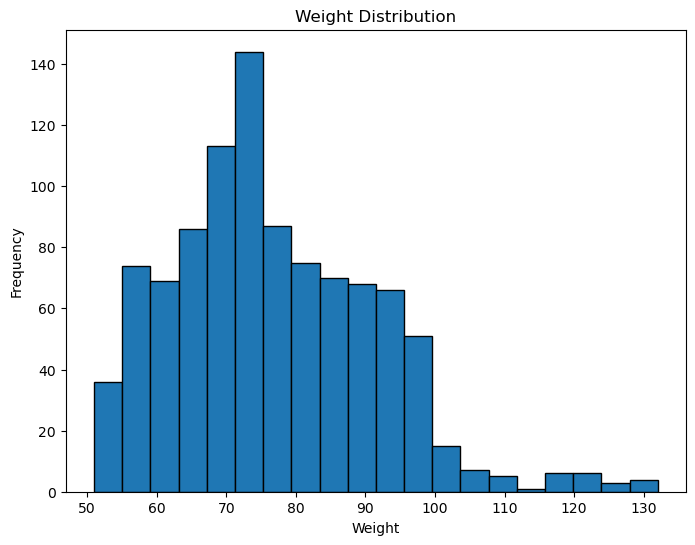

In [14]:
# Histogram of weight distribution
plt.figure(figsize=(8, 6))
plt.hist(health_df['Weight'], bins=20, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution')
plt.show()

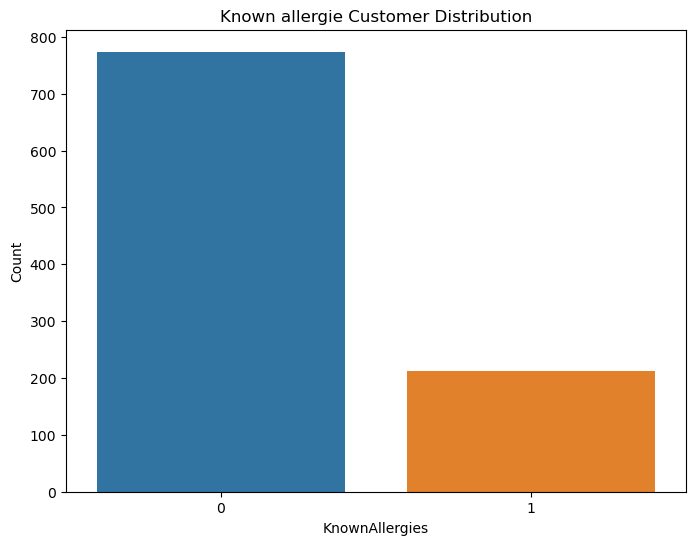

In [15]:
# Histogram of known allergies distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=health_df, x='KnownAllergies')
plt.xlabel('KnownAllergies')
plt.ylabel('Count')
plt.title('Known allergie Customer Distribution')
plt.show()

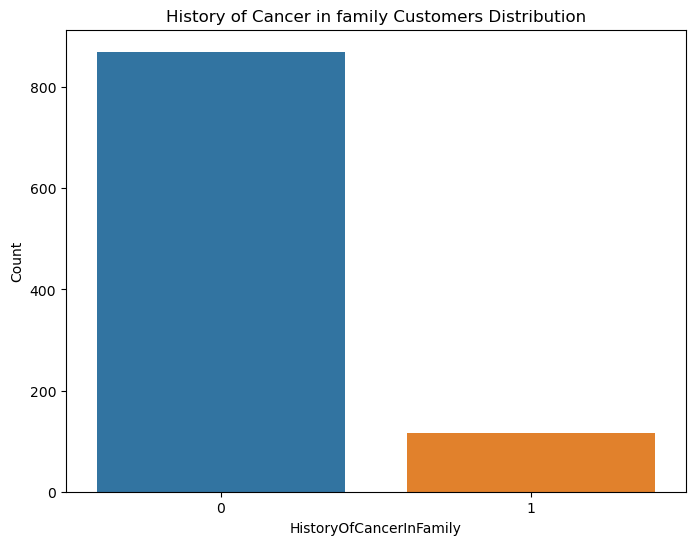

In [16]:
# Histogram of cancer blood relatives distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=health_df, x='HistoryOfCancerInFamily')
plt.xlabel('HistoryOfCancerInFamily')
plt.ylabel('Count')
plt.title('History of Cancer in family Customers Distribution')
plt.show()

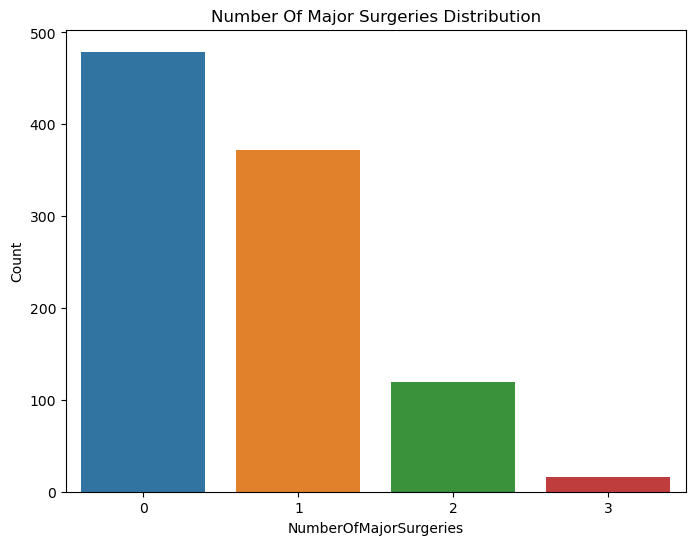

In [17]:
#histogram of customers who went through major surgeries 

plt.figure(figsize=(8, 6))
sns.countplot(data=health_df, x='NumberOfMajorSurgeries')
plt.xlabel('NumberOfMajorSurgeries')
plt.ylabel('Count')
plt.title('Number Of Major Surgeries Distribution')
plt.show()

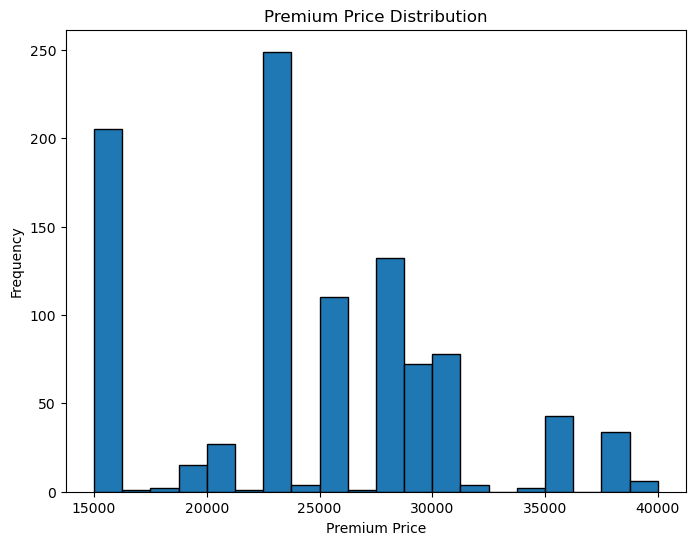

In [18]:
# Histogram of premium price distribution
plt.figure(figsize=(8, 6))
plt.hist(health_df['PremiumPrice'], bins=20, edgecolor='black')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')
plt.title('Premium Price Distribution')
plt.show()

## Bivariate Analysis 

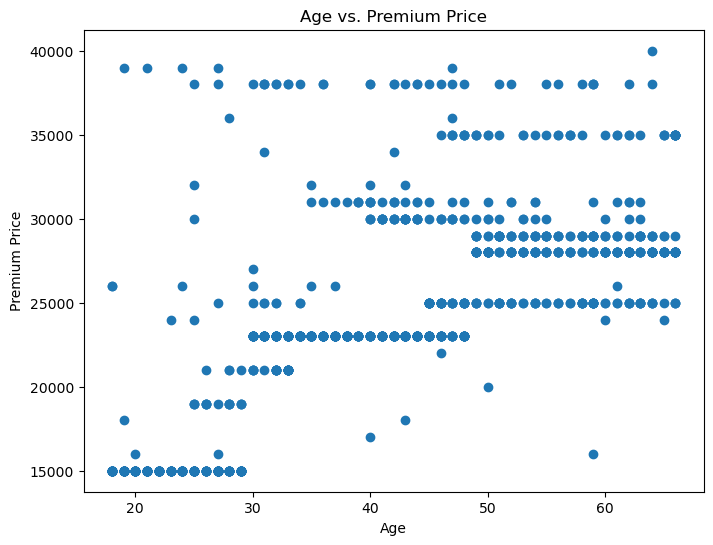

In [19]:
# Scatter plot of age vs. premium price
plt.figure(figsize=(8, 6))
plt.scatter(health_df['Age'], health_df['PremiumPrice'])
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.title('Age vs. Premium Price')
plt.show()

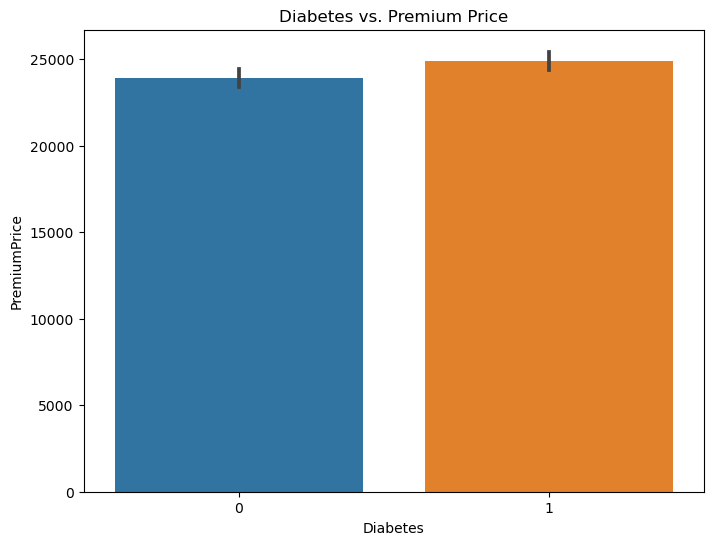

In [20]:
# Visualization : Grouped bar plot of smoker vs. premium price
plt.figure(figsize=(8, 6))
sns.barplot(data=health_df, x='Diabetes', y='PremiumPrice')
plt.xlabel('Diabetes')
plt.ylabel('PremiumPrice')
plt.title('Diabetes vs. Premium Price')
plt.show()

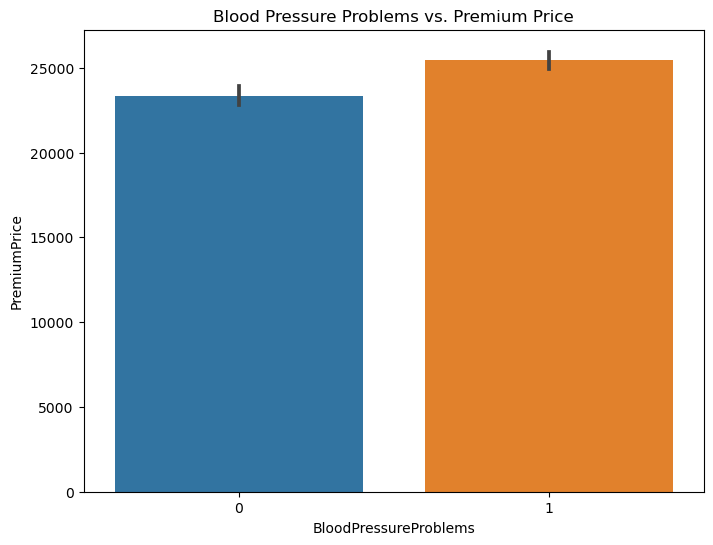

In [21]:
# Visualization : Grouped bar plot of BloodPressureProblems vs. premium price

plt.figure(figsize=(8, 6))
sns.barplot(data=health_df, x='BloodPressureProblems', y='PremiumPrice')
plt.xlabel('BloodPressureProblems')
plt.ylabel('PremiumPrice')
plt.title('Blood Pressure Problems vs. Premium Price')
plt.show()

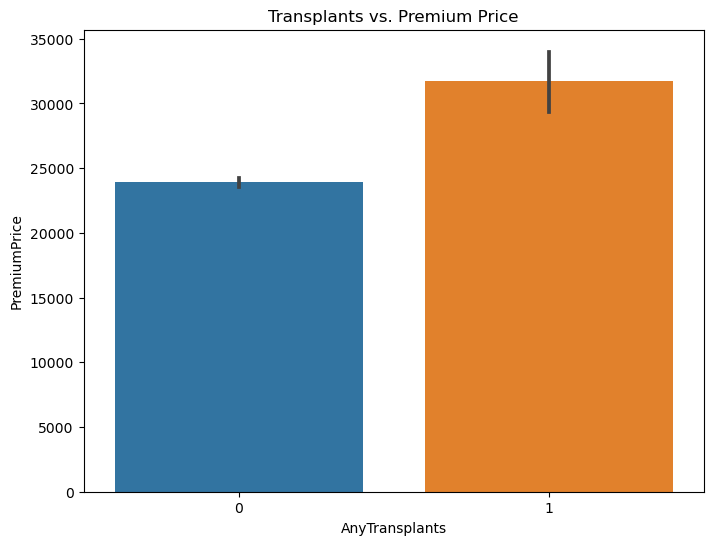

In [22]:
# Visualization : Grouped bar plot of transplants vs. premium price

plt.figure(figsize=(8, 6))
sns.barplot(data=health_df, x='AnyTransplants', y='PremiumPrice')
plt.xlabel('AnyTransplants')
plt.ylabel('PremiumPrice')
plt.title('Transplants vs. Premium Price')
plt.show()

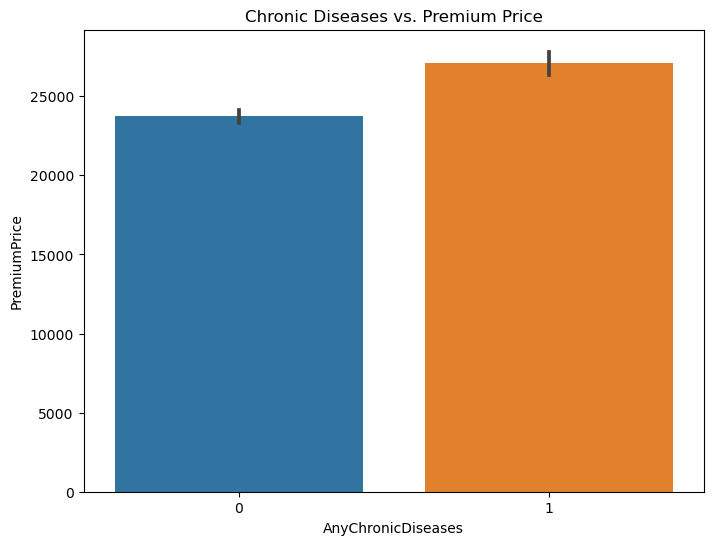

In [23]:
# Visualization : Grouped bar plot of chronic diseases vs. premium price

plt.figure(figsize=(8, 6))
sns.barplot(data=health_df, x='AnyChronicDiseases', y='PremiumPrice')
plt.xlabel('AnyChronicDiseases')
plt.ylabel('PremiumPrice')
plt.title('Chronic Diseases vs. Premium Price')
plt.show()

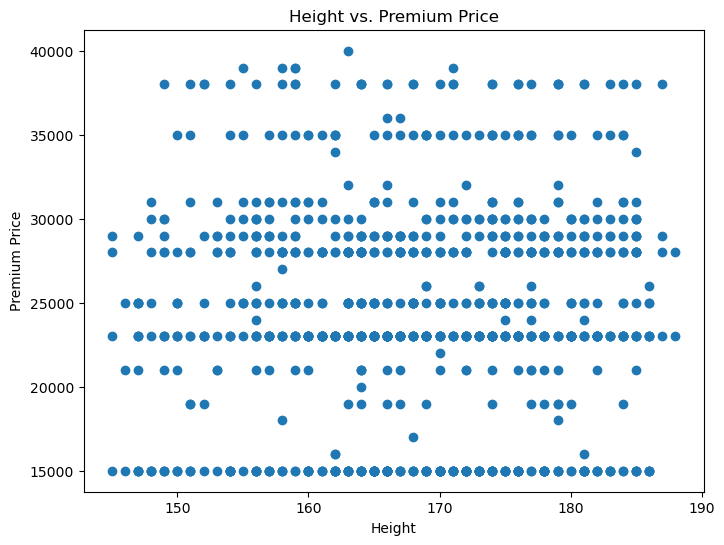

In [24]:
# Scatter plot of height vs. premium price
plt.figure(figsize=(8, 6))
plt.scatter(health_df['Height'], health_df['PremiumPrice'])
plt.xlabel('Height')
plt.ylabel('Premium Price')
plt.title('Height vs. Premium Price')
plt.show()

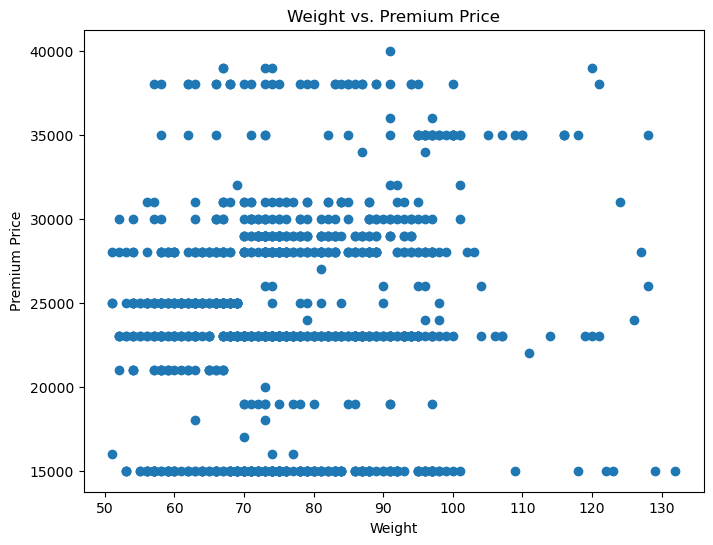

In [25]:
# Scatter plot of weight vs. premium price
plt.figure(figsize=(8, 6))
plt.scatter(health_df['Weight'], health_df['PremiumPrice'])
plt.xlabel('Weight')
plt.ylabel('Premium Price')
plt.title('Weight vs. Premium Price')
plt.show()

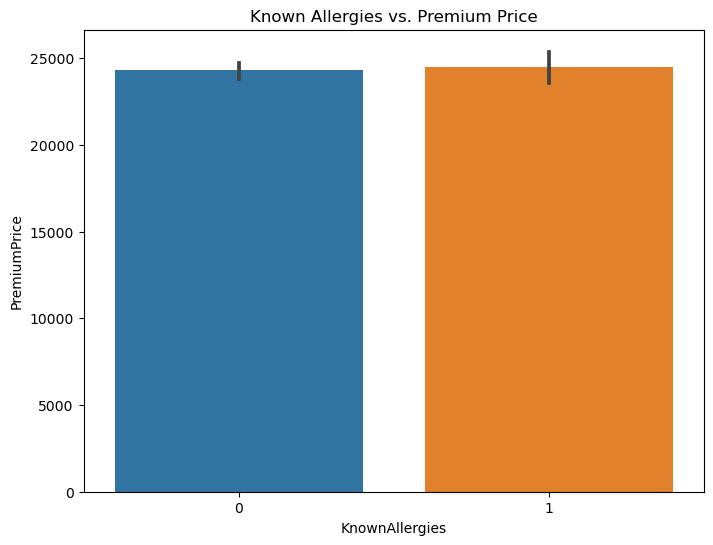

In [26]:
# Visualization : Grouped bar plot of known allegies vs. premium price

plt.figure(figsize=(8, 6))
sns.barplot(data=health_df, x='KnownAllergies', y='PremiumPrice')
plt.xlabel('KnownAllergies')
plt.ylabel('PremiumPrice')
plt.title('Known Allergies vs. Premium Price')
plt.show()

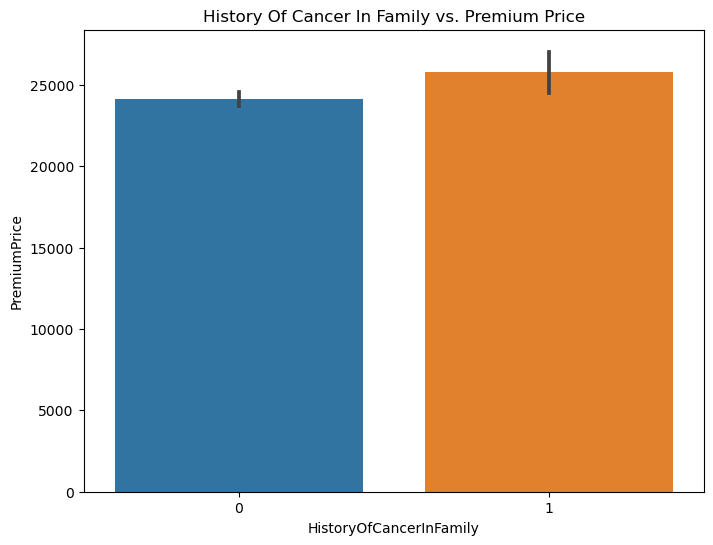

In [27]:
# Visualization : Grouped bar plot of History Of Cancer In Family vs. premium price

plt.figure(figsize=(8, 6))
sns.barplot(data=health_df, x='HistoryOfCancerInFamily', y='PremiumPrice')
plt.xlabel('HistoryOfCancerInFamily')
plt.ylabel('PremiumPrice')
plt.title('History Of Cancer In Family vs. Premium Price')
plt.show()


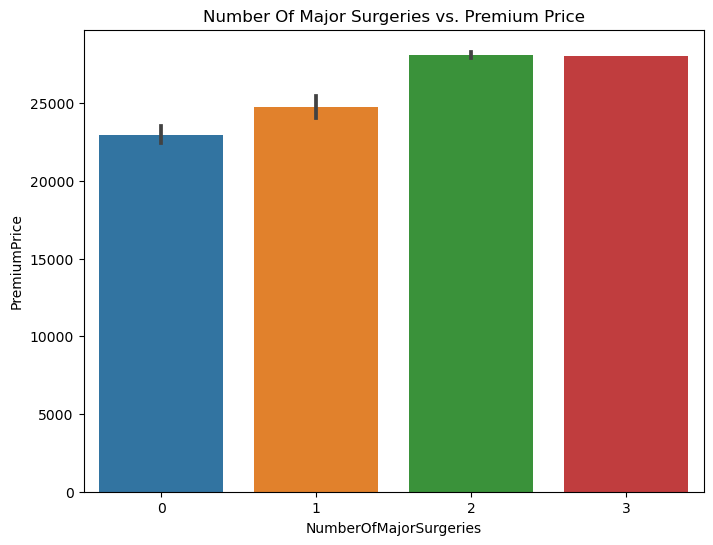

In [28]:
# Visualization : Grouped bar plot of Number Of Major Surgeries vs. premium price

plt.figure(figsize=(8, 6))
sns.barplot(data=health_df, x='NumberOfMajorSurgeries', y='PremiumPrice')
plt.xlabel('NumberOfMajorSurgeries')
plt.ylabel('PremiumPrice')
plt.title('Number Of Major Surgeries vs. Premium Price')
plt.show()

### Feature Engineering (Adding BMI column)

In [29]:
import pandas as pd

# Convert height from centimeters to meters
health_df['Height'] = health_df['Height'] / 100

# Calculate BMI using the formula: BMI = weight / (height^2)
health_df['BMI'] = health_df['Weight'] / (health_df['Height'] ** 2)
health_df['BMI'] = health_df['BMI'].astype(int)


In [30]:
# Display the updated DataFrame with the BMI column
health_df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,1.55,57,0,0,0,25000,23
1,60,1,0,0,0,1.80,73,0,0,0,29000,22
2,36,1,1,0,0,1.58,59,0,0,1,23000,23
3,52,1,1,0,1,1.83,93,0,0,2,28000,27
4,38,0,0,0,1,1.66,88,0,0,1,23000,31


## Preprocessing

#### Checking for Null Values

In [31]:
columns_with_null = health_df.columns[health_df.isnull().any()].tolist()
print(columns_with_null)

[]


#### Checking for Categorical columns

In [32]:
categorical_columns = health_df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

[]


#### Checking for Missing Values

In [33]:
# Check for missing values in the combined DataFrame
missing_values = health_df.isnull().sum()

# Print out the number of missing values for each column
print(missing_values)

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
BMI                        0
dtype: int64


#### Checking for Duplicate Values

In [34]:
# Count the number of duplicate rows
num_duplicates = health_df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


#### Identifying and Removing Outliers

In [36]:
label_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    float64
 6   Weight                   986 non-null    int64  
 7   KnownAllergies           986 non-null    int64  
 8   HistoryOfCancerInFamily  986 non-null    int64  
 9   NumberOfMajorSurgeries   986 non-null    int64  
 10  PremiumPrice             986 non-null    int64  
 11  BMI                      986 non-null    int32  
dtypes: float64(1), int32(1), int64(10)
memory usage: 88.7 KB


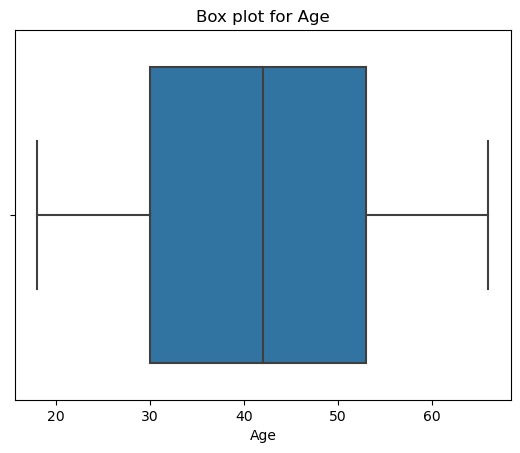

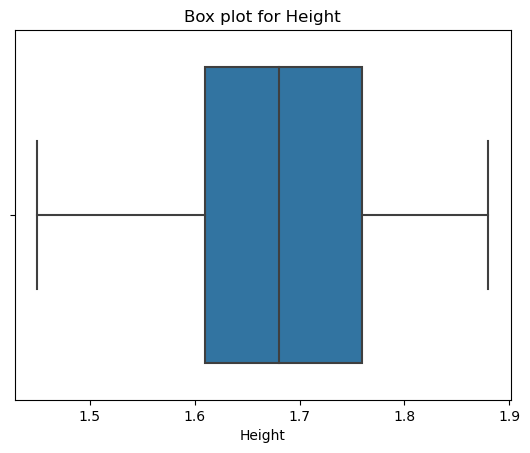

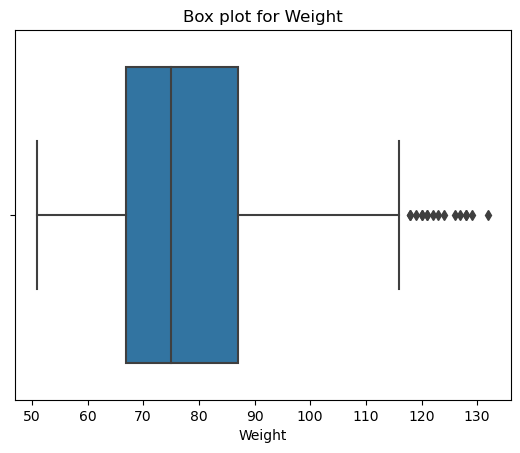

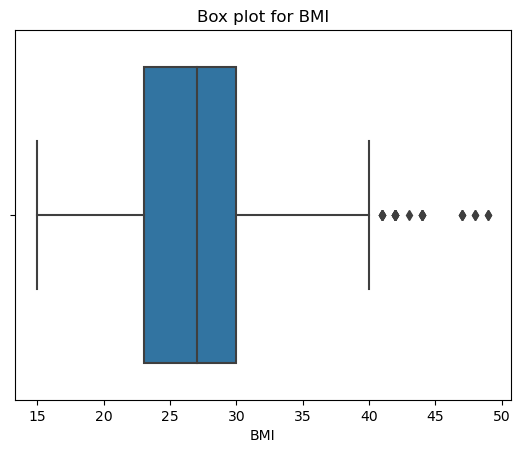

In [35]:
import numpy as np

label_encoded_df = health_df

#Identify numerical columns
# numerical_columns = label_encoded_df.select_dtypes(include=[np.number]).columns
numerical_columns = ['Age','Height','Weight','BMI']
categorical_columns = ['Diabetes', 'BloodPressureProblems','AnyTransplants','age_bin_encoded' 
                       'AnyChronicDiseases','KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
target_column='PremiumPrice'
#detecting outliers in numerical columns
outliers_indices = []
for column in numerical_columns:
    Q1 = label_encoded_df[column].quantile(0.25)
    Q3 = label_encoded_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = label_encoded_df[(label_encoded_df[column] < lower_bound) | (label_encoded_df[column] > upper_bound)]
    outliers_indices.extend(outliers.index)

#Visualize outliers using box plots
import seaborn as sns
import matplotlib.pyplot as plt

for column in numerical_columns:
    sns.boxplot(x=label_encoded_df[column])
    plt.title(f'Box plot for {column}')
    plt.show()


In [37]:
#Remove outliers
health_df_nooutliers = label_encoded_df.drop(outliers_indices)

print("Original DataFrame shape:", label_encoded_df.shape)
print("DataFrame shape after removing outliers:", health_df_nooutliers.shape)

Original DataFrame shape: (986, 12)
DataFrame shape after removing outliers: (956, 12)


## Identifying Important features of dataset

In [38]:
correlation_matrix = health_df_nooutliers.corr()
correlation_with_charges = correlation_matrix['PremiumPrice'].sort_values(ascending=False)

print(correlation_with_charges)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

PremiumPrice               1.000000
Age                        0.696778
AnyTransplants             0.309463
NumberOfMajorSurgeries     0.256936
AnyChronicDiseases         0.214823
BloodPressureProblems      0.161715
Weight                     0.155664
BMI                        0.112603
Diabetes                   0.081367
HistoryOfCancerInFamily    0.070517
Height                     0.027856
KnownAllergies             0.009975
Name: PremiumPrice, dtype: float64


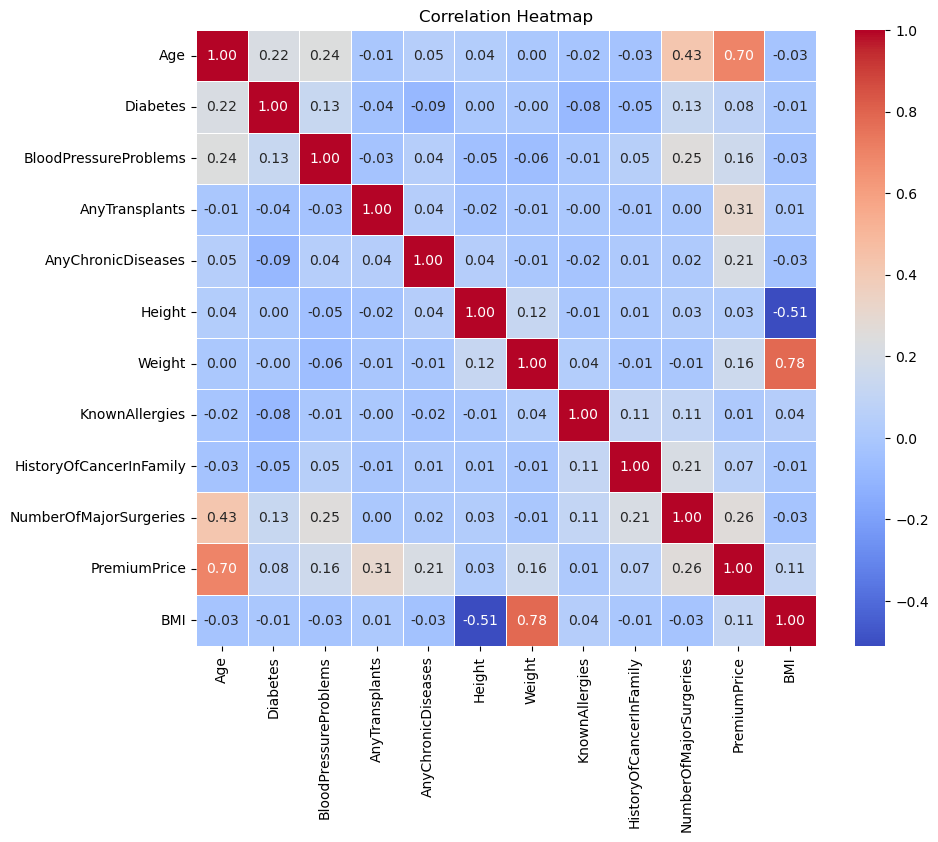

In [39]:
import seaborn as sns

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#all features dataframe
# columns_feature_set_df1 = ['Age','NumberOfMajorSurgeries','BloodPressureProblems','Weight', 'Diabetes','Height','AnyTransplants','AnyChronicDiseases' ,'HistoryOfCancerInFamily','KnownAllergies','BMI']
# # Creating a new DataFrame with only the selected columns
# feature_set_df1 =  health_df[columns_feature_set_df1].copy()

In [ ]:
#top 6 features without outlier removal
# columns_feature_set_df2 = ['Age','AnyTransplants','NumberOfMajorSurgeries','AnyChronicDiseases','BloodPressureProblems','Weight','BMI']

# # Creating a new DataFrame with only the selected columns
# feature_set_df2 =  health_df[columns_feature_set_df2].copy()


In [40]:
#top 6 features after outlier removal
columns_feature_set_df = ['Age','AnyTransplants','NumberOfMajorSurgeries','AnyChronicDiseases','BloodPressureProblems','Weight','BMI']

# Creating a new DataFrame with only the selected columns
feature_set_df =  health_df_nooutliers[columns_feature_set_df].copy()



In [41]:
feature_set_df.head()

,Age,AnyTransplants,NumberOfMajorSurgeries,AnyChronicDiseases,BloodPressureProblems,Weight,BMI
0,45,0,0,0,0,57,23
1,60,0,0,0,0,73,22
2,36,0,1,0,1,59,23
3,52,0,2,1,1,93,27
4,38,0,1,1,0,88,31


In [42]:
# feature_set_df2.head()

In [43]:
# feature_set_df3.head()

## Machine Learning Models Training 

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = feature_set_df # Features
y = health_df_nooutliers['PremiumPrice']  # Target variable

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_linear = linear_model.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae_linear = mean_absolute_error(y_test, predictions_linear)
print("Mean Absolute Error:", mae_linear)

# Calculate Mean Squared Error
mse_linear = mean_squared_error(y_test, predictions_linear)
print("Mean Squared Error:", mse_linear)

# Calculate Root Mean Squared Error
rmse_linear = mean_squared_error(y_test, predictions_linear, squared=False)
print("Root Mean Squared Error:", rmse_linear)

# Calculate R-squared
r2_linear = r2_score(y_test, predictions_linear)
print("R-squared:", r2_linear)

Mean Absolute Error: 2985.083116901368
Mean Squared Error: 17619135.897201717
Root Mean Squared Error: 4197.515443354761
R-squared: 0.5433662272917568


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Decision Tree Regression

In [47]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_tree = tree_model.predict(X_test)


In [48]:

# Calculate Mean Absolute Error
mae_tree = mean_absolute_error(y_test, predictions_tree)
print("Mean Absolute Error:", mae_tree)

# Calculate Mean Squared Error
mse_tree = mean_squared_error(y_test, predictions_tree)
print("Mean Squared Error:",mse_tree)

# Calculate Root Mean Squared Error
rmse_tree = mean_squared_error(y_test, predictions_tree, squared=False)
print("Root Mean Squared Error:", rmse_tree)

# Calculate R-squared
r2_tree = r2_score(y_test, predictions_tree)
print("R-squared:", r2_tree)

Mean Absolute Error: 1707.112970711297
Mean Squared Error: 25171548.11715481
Root Mean Squared Error: 5017.12548349698
R-squared: 0.34763094803820693


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Random Forest  Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_forest = forest_model.predict(X_test)


In [50]:

# Calculate Mean Absolute Error
mae_forest = mean_absolute_error(y_test, predictions_forest)
print("Mean Absolute Error:", mae_forest)

# Calculate Mean Squared Error
mse_forest = mean_squared_error(y_test, predictions_forest)
print("Mean Squared Error:", mse_forest)

# Calculate Root Mean Squared Error
rmse_forest = mean_squared_error(y_test, predictions_forest, squared=False)
print("Root Mean Squared Error:", rmse_forest)

# Calculate R-squared
r2_forest = r2_score(y_test, predictions_forest)
print("R-squared:", r2_forest)

Mean Absolute Error: 1439.8744769874477
Mean Squared Error: 12262607.949790794
Root Mean Squared Error: 3501.800672481344
R-squared: 0.6821909448893924


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Xgboost Regression

In [51]:
!pip install xgboost 

from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_xgb = xgb_model.predict(X_test)


In [52]:

# Calculate Mean Absolute Error
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
print("Mean Absolute Error:", mae_xgb)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(y_test, predictions_xgb)
print("Mean Squared Error:", mse_xgb)

# Calculate Root Mean Squared Error
rmse_xgb = mean_squared_error(y_test, predictions_xgb, squared=False)
print("Root Mean Squared Error:", rmse_xgb)

# Calculate R-squared
r2_xgb = r2_score(y_test, predictions_xgb)
print("R-squared:", r2_xgb)

Mean Absolute Error: 1860.6413890886506
Mean Squared Error: 14806086.013676716
Root Mean Squared Error: 3847.867722996298
R-squared: 0.6162718220170075


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### K-Nearest Neighbors (KNN) 

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Standardize features for KNN
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train)
X_test_scaled_knn = scaler_knn.transform(X_test)

# Initialize and train the model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled_knn, y_train)

# Make predictions on the scaled test set
predictions_knn = knn_model.predict(X_test_scaled_knn)


In [54]:

# Calculate Mean Absolute Error
mae_knn = mean_absolute_error(y_test, predictions_knn)
print("Mean Absolute Error:", mae_knn)

# Calculate Mean Squared Error
mse_knn = mean_squared_error(y_test, predictions_knn )
print("Mean Squared Error:", mse_knn)

# Calculate Root Mean Squared Error
rmse_knn = mean_squared_error(y_test, predictions_knn, squared=False)
print("Root Mean Squared Error:", rmse_knn)

# Calculate R-squared
r2_knn = r2_score(y_test, predictions_knn)
print("R-squared:", r2_knn)

Mean Absolute Error: 2303.765690376569
Mean Squared Error: 15851882.845188284
Root Mean Squared Error: 3981.4423071530605
R-squared: 0.5891679869909493


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Ridge Regression

In [55]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Standardize features for Ridge Regression
scaler_ridge = StandardScaler()
X_train_scaled_ridge = scaler_ridge.fit_transform(X_train)
X_test_scaled_ridge = scaler_ridge.transform(X_test)

# Initialize and train the model
ridge_model = Ridge()
ridge_model.fit(X_train_scaled_ridge, y_train)

# Make predictions on the scaled test set
predictions_ridge = ridge_model.predict(X_test_scaled_ridge)


In [56]:

# Calculate Mean Absolute Error
mae_ridge = mean_absolute_error(y_test, predictions_ridge)
print("Mean Absolute Error:", mae_ridge)

# Calculate Mean Squared Error
mse_ridge = mean_squared_error(y_test, predictions_ridge )
print("Mean Squared Error:", mse_ridge)

# Calculate Root Mean Squared Error
rmse_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
print("Root Mean Squared Error:", rmse_ridge)

# Calculate R-squared
r2_ridge = r2_score(y_test, predictions_ridge)
print("R-squared:", r2_ridge)

Mean Absolute Error: 2984.862271531144
Mean Squared Error: 17614415.60392515
Root Mean Squared Error: 4196.953133396315
R-squared: 0.5434885627649458


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Lasso Regression

In [57]:
from sklearn.linear_model import Lasso
# Initialize and train the model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_lasso = lasso_model.predict(X_test)


In [58]:

# Calculate Mean Absolute Error
mae_lasso = mean_absolute_error(y_test, predictions_lasso)
print("Mean Absolute Error:", mae_lasso)

# Calculate Mean Squared Error
mse_lasso = mean_squared_error(y_test, predictions_lasso )
print("Mean Squared Error:", mse_lasso)

# Calculate Root Mean Squared Error
rmse_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
print("Root Mean Squared Error:", rmse_lasso)

# Calculate R-squared
r2_lasso = r2_score(y_test, predictions_lasso)
print("R-squared:", r2_lasso)

Mean Absolute Error: 2984.886921570689
Mean Squared Error: 17621854.941961158
Root Mean Squared Error: 4197.839318263761
R-squared: 0.5432957580205103


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Elastic Net Regression

In [59]:
from sklearn.linear_model import ElasticNet

# Initialize and train the model
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_elastic_net = elastic_net_model.predict(X_test)


In [60]:
# Calculate Mean Absolute Error
mae_elastic_net = mean_absolute_error(y_test, predictions_elastic_net)
print("Mean Absolute Error:", mae_elastic_net)

# Calculate Mean Squared Error
mse_elastic_net = mean_squared_error(y_test, predictions_elastic_net)
print("Mean Squared Error:", mse_elastic_net)

# Calculate Root Mean Squared Error
rmse_elastic_net = mean_squared_error(y_test, predictions_elastic_net, squared=False)
print("Root Mean Squared Error:", rmse_elastic_net)

# Calculate R-squared
r2_elastic_net = r2_score(y_test, predictions_elastic_net)
print("R-squared:", r2_elastic_net)

Mean Absolute Error: 3224.8614930705453
Mean Squared Error: 22797656.008811377
Root Mean Squared Error: 4774.6891007490085
R-squared: 0.4091549249097033


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### CatBoost Regression

In [61]:
!pip install catboost
from catboost import CatBoostRegressor

# Initialize and train the model
catboost_model = CatBoostRegressor(iterations=100, depth=10, learning_rate=0.05)
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_catboost = catboost_model.predict(X_test)

# Evaluate the model
mae_catboost = mean_absolute_error(y_test, predictions_catboost)
print("CatBoost Regressor - Mean Absolute Error:", mae_catboost)

0:	learn: 5980.8362311	total: 137ms	remaining: 13.6s
1:	learn: 5813.3494695	total: 140ms	remaining: 6.84s
2:	learn: 5646.8767963	total: 145ms	remaining: 4.69s
3:	learn: 5473.1905523	total: 148ms	remaining: 3.55s
4:	learn: 5326.4527643	total: 149ms	remaining: 2.83s
5:	learn: 5171.7199432	total: 151ms	remaining: 2.36s
6:	learn: 5043.5200619	total: 156ms	remaining: 2.07s
7:	learn: 4910.0847230	total: 160ms	remaining: 1.84s
8:	learn: 4792.1621809	total: 165ms	remaining: 1.67s
9:	learn: 4677.1922347	total: 166ms	remaining: 1.49s
10:	learn: 4554.9003995	total: 167ms	remaining: 1.35s
11:	learn: 4445.3337827	total: 171ms	remaining: 1.25s
12:	learn: 4359.6633770	total: 175ms	remaining: 1.17s
13:	learn: 4259.7812522	total: 176ms	remaining: 1.08s
14:	learn: 4161.5383816	total: 180ms	remaining: 1.02s
15:	learn: 4069.8825999	total: 184ms	remaining: 968ms
16:	learn: 3986.6669442	total: 188ms	remaining: 920ms
17:	learn: 3915.9475835	total: 194ms	remaining: 882ms
18:	learn: 3837.9428334	total: 199ms	r

In [62]:
# Calculate Mean Absolute Error
mae_catboost = mean_absolute_error(y_test, predictions_catboost)
print("Mean Absolute Error:", mae_catboost)

# Calculate Mean Squared Error
mse_catboost = mean_squared_error(y_test, predictions_catboost)
print("Mean Squared Error:", mse_catboost)

# Calculate Root Mean Squared Error
rmse_catboost = mean_squared_error(y_test, predictions_catboost, squared=False)
print("Root Mean Squared Error:", rmse_catboost)

# Calculate R-squared
r2_catboost = r2_score(y_test, predictions_catboost)
print("R-squared:", r2_catboost)

Mean Absolute Error: 1922.3275843735048
Mean Squared Error: 12971242.37017685
Root Mean Squared Error: 3601.561101824714
R-squared: 0.6638253218111801


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Gradient Boosting Machines (GBM)

In [63]:
import xgboost as xgb

# Initialize and train the model
gbm_model = xgb.XGBRegressor()
gbm_model.fit(X_train, y_train)

# Make predictions
predictions_gbm = gbm_model.predict(X_test)


In [64]:
# Calculate Mean Absolute Error
mae_gbm = mean_absolute_error(y_test, predictions_gbm)
print("Mean Absolute Error:", mae_gbm)

# Calculate Mean Squared Error
mse_gbm = mean_squared_error(y_test, predictions_gbm)
print("Mean Squared Error:", mse_gbm)

# Calculate Root Mean Squared Error
rmse_gbm = mean_squared_error(y_test, predictions_gbm, squared=False)
print("Root Mean Squared Error:", rmse_gbm)

# Calculate R-squared
r2_gbm = r2_score(y_test, predictions_gbm)
print("R-squared:", r2_gbm)

Mean Absolute Error: 1860.6413890886506
Mean Squared Error: 14806086.013676716
Root Mean Squared Error: 3847.867722996298
R-squared: 0.6162718220170075


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### LightGBM 

In [65]:
!pip install lightgbm
import lightgbm as lgb

# Create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)

# Specify parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

# Train the model
lgb_model = lgb.train(params, lgb_train, num_boost_round=100)

# Make predictions
predictions_lgbm = lgb_model.predict(X_test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 717, number of used features: 7
[LightGBM] [Info] Start training from score 24186.889819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [66]:
# Calculate Mean Absolute Error
mae_lgbm = mean_absolute_error(y_test, predictions_lgbm)
print("Mean Absolute Error:", mae_lgbm)

# Calculate Mean Squared Error
mse_lgbm = mean_squared_error(y_test, predictions_lgbm)
print("Mean Squared Error:", mse_lgbm)

# Calculate Root Mean Squared Error
rmse_lgbm = mean_squared_error(y_test, predictions_lgbm, squared=False)
print("Root Mean Squared Error:", rmse_lgbm)

# Calculate R-squared
r2_lgbm = r2_score(y_test, predictions_lgbm)
print("R-squared:", r2_lgbm)

Mean Absolute Error: 1761.0014308309524
Mean Squared Error: 11546442.262003567
Root Mean Squared Error: 3398.0056300723763
R-squared: 0.7007517552382365


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Model Performance Comparison 

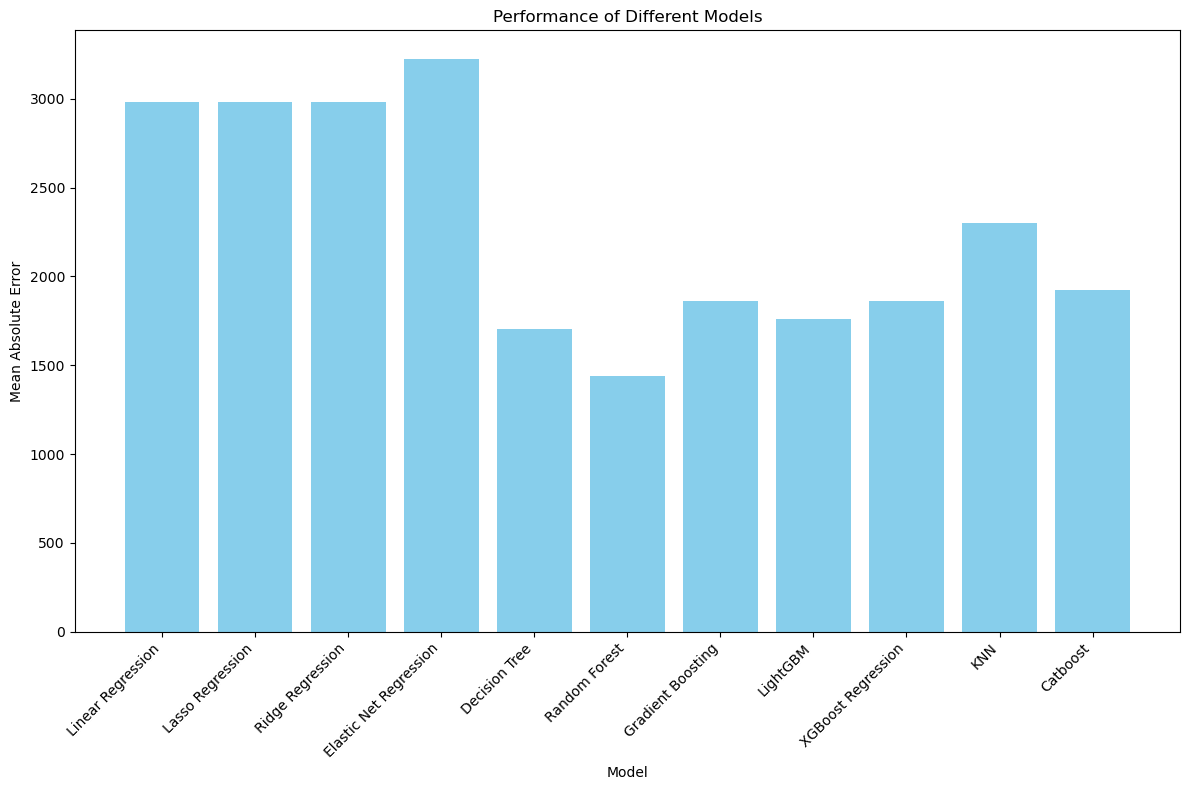

In [67]:
import matplotlib.pyplot as plt

# Dictionary containing mean absolute errors for each model
mae_scores = {
    'Linear Regression': mae_linear,
    'Lasso Regression' : mae_lasso,
    'Ridge Regression' : mae_ridge,
    'Elastic Net Regression' : mae_elastic_net,
    'Decision Tree': mae_tree,
    'Random Forest': mae_forest,
    'Gradient Boosting': mae_gbm,
    'LightGBM': mae_lgbm,
    'XGBoost Regression' : mae_xgb,
    'KNN': mae_knn,
    'Catboost' : mae_catboost,

}

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(mae_scores.keys(), mae_scores.values(), color='skyblue')
plt.title('Performance of Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Barchart Explanation on Model Performance 

In above bar chart, 
shorter bars represent lower Mean Absolute Error (MAE), indicating higher accuracy. 
Taller bars signify higher MAE, suggesting less accuracy. 

Therefore , the most accurate model is the Decision Tree Model 

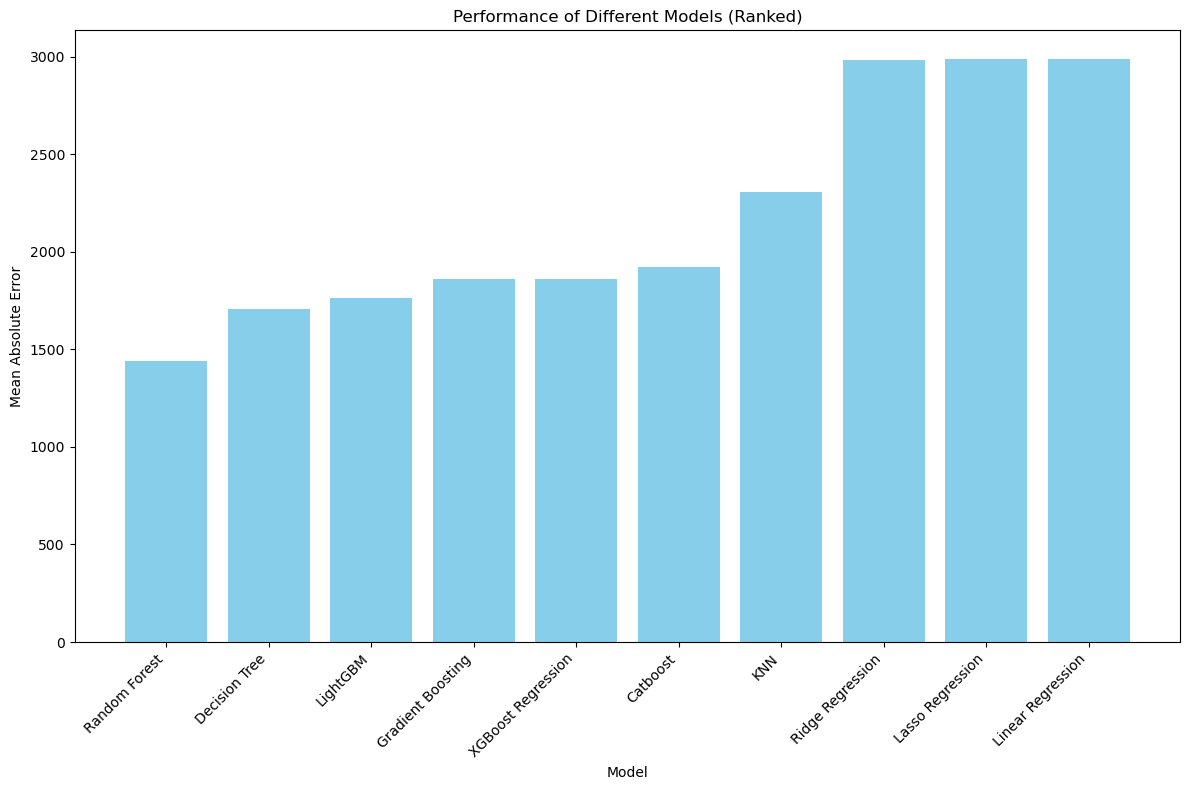

In [68]:
import matplotlib.pyplot as plt

# Dictionary containing mean absolute errors for each model
mae_scores = {
    'Linear Regression': mae_linear,
    'Lasso Regression' : mae_lasso,
    'Ridge Regression' : mae_ridge,
    'Decision Tree': mae_tree,
    'Random Forest': mae_forest,
    'Gradient Boosting': mae_gbm,
    'LightGBM': mae_lgbm,
    'XGBoost Regression' : mae_xgb,
    'KNN': mae_knn,
    'Catboost' : mae_catboost
}

# Sort models based on their MAE scores
sorted_models = sorted(mae_scores.items(), key=lambda x: x[1])

# Extracting model names and sorted MAE scores
sorted_model_names = [model[0] for model in sorted_models]
sorted_mae_scores = [model[1] for model in sorted_models]

# Plotting the bar chart with rankings
plt.figure(figsize=(12, 8))
plt.bar(sorted_model_names, sorted_mae_scores, color='skyblue')
plt.title('Performance of Different Models (Ranked)')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


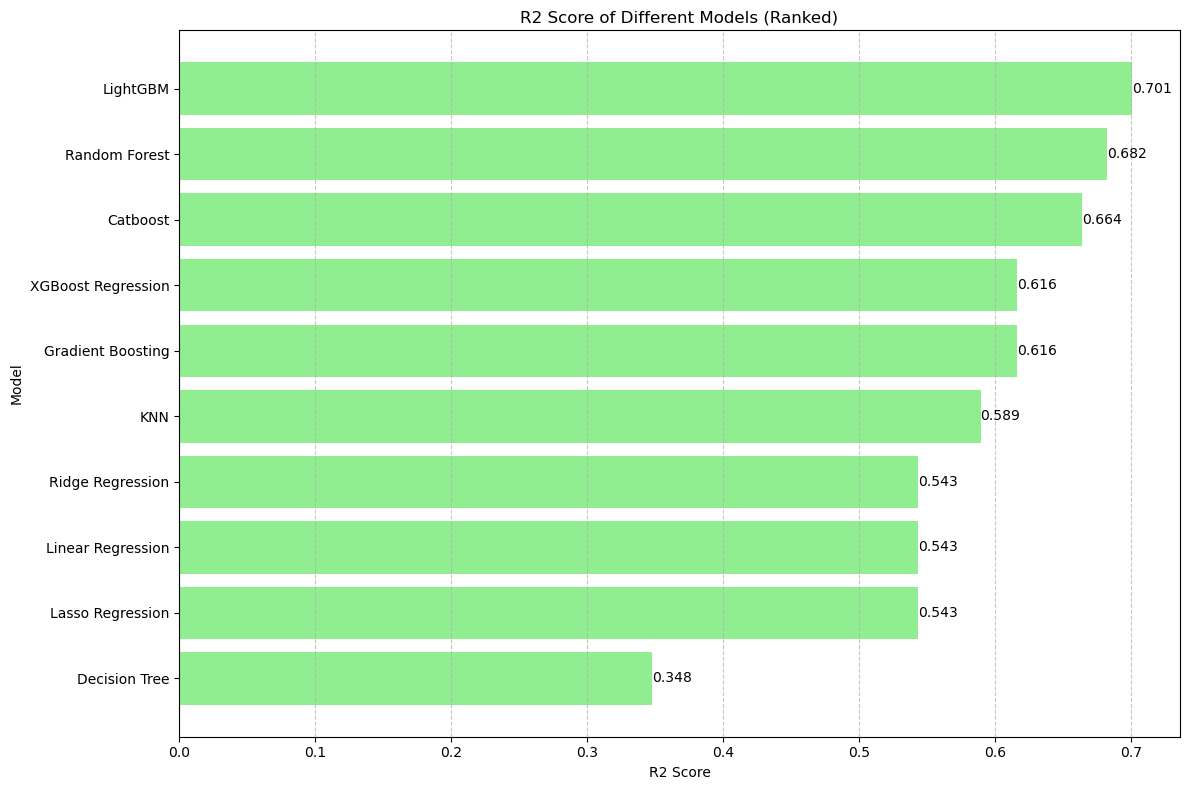

In [69]:
import matplotlib.pyplot as plt

# Dictionary containing R2 scores for each model
r2_scores = {
    'Linear Regression': r2_linear,
    'Lasso Regression': r2_lasso,
    'Ridge Regression' : r2_ridge,
    'Decision Tree': r2_tree,
    'Random Forest': r2_forest,
    'Gradient Boosting': r2_gbm,
    'LightGBM': r2_lgbm,
    'XGBoost Regression': r2_xgb,
    'KNN': r2_knn,
    'Catboost': r2_catboost
}

# Sort models based on their R2 scores
sorted_r2_models = sorted(r2_scores.items(), key=lambda x: x[1])

# Extracting model names and sorted R2 scores
sorted_r2_model_names = [model[0] for model in sorted_r2_models]
sorted_r2_scores = [model[1] for model in sorted_r2_models]

# Plotting the horizontal bar chart with rankings and values
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_r2_model_names, sorted_r2_scores, color='lightgreen')
plt.title('R2 Score of Different Models (Ranked)')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotating bars with their corresponding values
for bar, score in zip(bars, sorted_r2_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.3f}', va='center', ha='left')

plt.tight_layout()
plt.show()


In [71]:
import pandas as pd

# Create lists or arrays to store the evaluation metrics for each model
model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree", "Random Forest", "Gradient Boosting","LightGBM", "XGBoost Regression", "KNN", "Catboost"]
mae_scores = [mae_linear, mae_lasso, mae_ridge, mae_tree, mae_forest, mae_gbm, mae_lgbm, mae_xgb, mae_knn, mae_catboost]
mse_scores = [mse_linear, mse_lasso, mse_ridge, mse_tree, mse_forest, mse_gbm, mse_lgbm, mse_xgb, mse_knn, mse_catboost]
rmse_scores = [rmse_linear, rmse_lasso, rmse_ridge, rmse_tree, rmse_forest, rmse_gbm, rmse_lgbm, rmse_xgb, rmse_knn, rmse_catboost]
r2_scores = [r2_linear, r2_lasso, r2_ridge, r2_tree, r2_forest, r2_gbm, r2_lgbm, r2_xgb, r2_knn, r2_catboost]


# Create a DataFrame
metrics_df = pd.DataFrame({
    "Model": model_names,
    "MAE": mae_scores,
    "MSE": mse_scores,
    "RMSE": rmse_scores,
    "R-squared": r2_scores
})


# Sort the DataFrame by the "R-squared" column in ascending order
sorted_metrics_df = metrics_df.sort_values(by="R-squared")

# Display the sorted table
print(sorted_metrics_df)


                Model          MAE           MSE         RMSE  R-squared
3       Decision Tree  1707.112971  2.517155e+07  5017.125483   0.347631
1    Lasso Regression  2984.886922  1.762185e+07  4197.839318   0.543296
0   Linear Regression  2985.083117  1.761914e+07  4197.515443   0.543366
2    Ridge Regression  2984.862272  1.761442e+07  4196.953133   0.543489
8                 KNN  2303.765690  1.585188e+07  3981.442307   0.589168
5   Gradient Boosting  1860.641389  1.480609e+07  3847.867723   0.616272
7  XGBoost Regression  1860.641389  1.480609e+07  3847.867723   0.616272
9            Catboost  1922.327584  1.297124e+07  3601.561102   0.663825
4       Random Forest  1439.874477  1.226261e+07  3501.800672   0.682191
6            LightGBM  1761.001431  1.154644e+07  3398.005630   0.700752


### Selection of the most appropriate model to be used for Nature Inspired Optimization Algorithms

In order to select the best performing ML model , we trained 10 different ML models. These include :
- Linear Regression
- Lasso Regression
- Ridge Regression
- Decision Trees
- Random Forest
- Gradient Boosting
- LightGBM
- XGBoost Regression
- KNN
- Catboost Regressor 

Based on the above findings:

- lowest MAE = random forest model
- Highest R2 Score = LightGBM 

since random forest model has the lowest mae and is more efficient , this model was selected for the use in nature inspired optimization algorithms

In [72]:
import pickle

# Save the Random Forest model since it has the highest r2 score using pickle
with open('RANDOM_FOREST_healthinsure_bmi.pkl', 'wb') as f:
    pickle.dump(forest_model, f)

### Assigning Risk Factors Based on top 6 features that affect premium charge 

We use Random Forest Model to calculate the feature importance - highest R2 Score 

In [73]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np


# Access feature importance scores using `feature_importances_` attribute
importance_scores = forest_model.feature_importances_

# Normalize importance scores
normalized_importance_scores = importance_scores / np.sum(importance_scores)

# Display feature importance scores
for i, score in enumerate(normalized_importance_scores):
    print(f"Feature '{X_train.columns[i]}': Importance Score = {score:.4f}")


Feature 'Age': Importance Score = 0.6828
Feature 'AnyTransplants': Importance Score = 0.0970
Feature 'NumberOfMajorSurgeries': Importance Score = 0.0388
Feature 'AnyChronicDiseases': Importance Score = 0.0342
Feature 'BloodPressureProblems': Importance Score = 0.0108
Feature 'Weight': Importance Score = 0.1013
Feature 'BMI': Importance Score = 0.0351


Risk factors for Random Forest

In [75]:
import numpy as np


importance_scores = {
'Age': 0.6828,
'AnyTransplants': 0.0970,     
'NumberOfMajorSurgeries': 0.0388,
'AnyChronicDiseases':  0.0342,
'BloodPressureProblems': 0.0108,
'Weight': 0.1013,
 'BMI' : 0.0351
}


# Normalize importance scores
normalized_scores = {feature: score / sum(importance_scores.values()) for feature, score in importance_scores.items()}

# Define risk factor scale
scale_min = 1
scale_max = 5

# Define non-linear mapping function (square root)
def custom_mapping(x):
    return np.sqrt(x)

# Calculate the custom mapping of importance scores
mapped_scores = {feature: custom_mapping(score) for feature, score in normalized_scores.items()}

# Rescale the mapped scores to the desired range of risk factors
min_score = min(mapped_scores.values())
max_score = max(mapped_scores.values())
rescaled_scores = {feature: ((score - min_score) / (max_score - min_score)) * (scale_max - scale_min) + scale_min for feature, 
                   score in mapped_scores.items()}

# Assign risk factors based on rescaled scores
risk_factors = {feature: int(round(score)) for feature, score in rescaled_scores.items()}

# Display risk factors assigned to each feature
for feature, risk_factor in risk_factors.items():
    print(f"Feature '{feature}': Risk Factor = {risk_factor}")


Feature 'Age': Risk Factor = 5
Feature 'AnyTransplants': Risk Factor = 2
Feature 'NumberOfMajorSurgeries': Risk Factor = 2
Feature 'AnyChronicDiseases': Risk Factor = 1
Feature 'BloodPressureProblems': Risk Factor = 1
Feature 'Weight': Risk Factor = 2
Feature 'BMI': Risk Factor = 1


Random forest risk factor table

In [76]:
import pandas as pd

importance_scores = {
'Age': 0.6828,
'AnyTransplants': 0.0970,     
'NumberOfMajorSurgeries': 0.0388,
'AnyChronicDiseases':  0.0342,
'BloodPressureProblems': 0.0108,
'Weight': 0.1013,
 'BMI' : 0.0351
}



risk_factors = {
'Age':  5,
'AnyTransplants':  2,
'NumberOfMajorSurgeries':2,
'AnyChronicDiseases':  1,
'BloodPressureProblems': 1,
'Weight': 2,
'BMI':1 
    
}


# Create DataFrame for importance scores
risk_factor_df = pd.DataFrame(list(importance_scores.items()), columns=['Feature', 'Importance Score'])

# Add risk factor values to the DataFrame
risk_factor_df['Risk Factor'] =risk_factor_df['Feature'].map(risk_factors)

# Display the DataFrame
print(risk_factor_df)

                  Feature  Importance Score  Risk Factor
0                     Age            0.6828            5
1          AnyTransplants            0.0970            2
2  NumberOfMajorSurgeries            0.0388            2
3      AnyChronicDiseases            0.0342            1
4   BloodPressureProblems            0.0108            1
5                  Weight            0.1013            2
6                     BMI            0.0351            1


### Nature Inspired Optimization Algorithms 

#### Particle Swarm Optimization (PSO)

In [77]:
pip install pyswarm

Note: you may need to restart the kernel to use updated packages.


In [78]:
from pyswarm import pso
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error  # Import mean_squared_error

In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pyswarm import pso
import pickle
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

importance_scores = {
'Age': 0.6828,
'AnyTransplants': 0.0970,     
'NumberOfMajorSurgeries': 0.0388,
'AnyChronicDiseases':  0.0342,
'BloodPressureProblems': 0.0108,
'Weight': 0.1013,
 'BMI' : 0.0351
}



risk_factors = {
'Age':  5,
'AnyTransplants':  2,
'NumberOfMajorSurgeries':2,
'AnyChronicDiseases':  1,
'BloodPressureProblems': 1,
'Weight': 2,
'BMI':1 
    
}


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def objective_function(params):
    max_depth, min_samples_split, min_samples_leaf = params

    # Rounding parameters to nearest integer
    max_depth = int(round(max_depth))
    min_samples_split = int(round(min_samples_split))
    min_samples_leaf = int(round(min_samples_leaf))

    # Train RandomForestRegressor with the rounded hyperparameters
    rf_model_pso = RandomForestRegressor(max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      random_state=42)
    rf_model_pso.fit(X_scaled, y)

    # Predict premiums using the RandomForestRegressor
    predicted_premiums_rf_for_pso = rf_model_pso.predict(X_scaled)

    # Calculate profitability (negative mean squared error)
    profitability = -mean_squared_error(y, predicted_premiums_rf_for_pso)

    # Adjust profitability based on risk factors
    adjusted_profitability = profitability

    for feature, importance_score in importance_scores.items():
        # Scale down importance score based on risk factor
        adjusted_importance_score = importance_score / risk_factors[feature]
        # If the feature has a higher risk factor, decrease the profitability
        adjusted_profitability -= np.sum(adjusted_importance_score * predicted_premiums_rf_for_pso)

    return adjusted_profitability

# Define bounds for hyperparameters
lb = [2, 2, 1]  # Lower bounds for max_depth, min_samples_split, min_samples_leaf
ub = [10, 10, 5]  # Upper bounds for max_depth, min_samples_split, min_samples_leaf

# Variables to store best hyperparameters and convergence data
best_hyperparameters = None
best_profitability = float('-inf')
convergence_curve = []

# Run PSO optimization
for i in range(50):  # Number of iterations
    # Run PSO for one iteration
    params, best_profitability_iter = pso(objective_function, lb, ub, swarmsize=10, maxiter=1)

    # Check if the new profitability is better than the previous best
    if best_profitability_iter > best_profitability:
        best_hyperparameters = params
        best_profitability = best_profitability_iter

    # Append best profitability value to convergence curve
    convergence_curve.append(best_profitability)

    print(f"Iteration {i+1}: Best Profitability = {best_profitability}")

# Extract the best hyperparameters
best_max_depth, best_min_samples_split, best_min_samples_leaf = best_hyperparameters

# Round the best_min_samples_split and best_min_samples_leaf to integers
best_min_samples_split = int(round(best_min_samples_split))
best_min_samples_leaf = int(round(best_min_samples_leaf))
best_max_depth = int(round(best_max_depth))  # Added this line to round max_depth

# Train RandomForestRegressor with the best hyperparameters
optimized_rf_pso_model = RandomForestRegressor(max_depth=best_max_depth,
                                            min_samples_split=best_min_samples_split,
                                            min_samples_leaf=best_min_samples_leaf,
                                            random_state=42)
optimized_rf_pso_model.fit(X_scaled, y)

# Predict premiums using the optimized RandomForestRegressor on entire dataset
predicted_premiums_pso_rf = optimized_rf_pso_model.predict(X_scaled)

# Save the new RandomForestRegressor model using pickle
with open('optimized_rf_pso_model_bmi.pkl', 'wb') as f:
    pickle.dump(optimized_rf_pso_model, f)

# Integrate predicted premiums into the original DataFrame
health_df_nooutliers['Predicted Premium (Optimized PSO RF)'] = predicted_premiums_pso_rf

# Display the updated DataFrame
print(health_df_nooutliers)


Stopping search: maximum iterations reached --> 1
Iteration 1: Best Profitability = -21343299.644708678
Stopping search: maximum iterations reached --> 1
Iteration 2: Best Profitability = -21343299.644708678
Stopping search: maximum iterations reached --> 1
Iteration 3: Best Profitability = -21343299.644708678
Stopping search: maximum iterations reached --> 1
Iteration 4: Best Profitability = -21343299.644708678
Stopping search: maximum iterations reached --> 1
Iteration 5: Best Profitability = -21343299.644708678
Stopping search: maximum iterations reached --> 1
Iteration 6: Best Profitability = -21343299.644708678
Stopping search: maximum iterations reached --> 1
Iteration 7: Best Profitability = -21343299.644708678
Stopping search: maximum iterations reached --> 1
Iteration 8: Best Profitability = -21343299.644708678
Stopping search: maximum iterations reached --> 1
Iteration 9: Best Profitability = -21343299.644708678
Stopping search: maximum iterations reached --> 1
Iteration 10: 

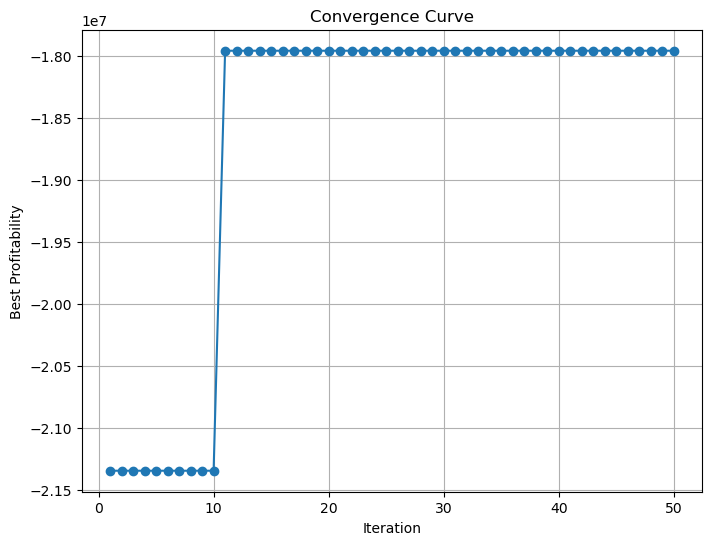

In [81]:
# Plot the convergence curve #use this
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 51), convergence_curve, marker='o', linestyle='-')
plt.title('Convergence Curve')
plt.xlabel('Iteration')
plt.ylabel('Best Profitability')
plt.grid(True)
plt.show()

In [82]:
# Compute R2 score #use this
r2 = r2_score(y,predicted_premiums_pso_rf)
print("R-squared (R2) score of Hybrid PSO-RandomForest model:", r2)

R-squared (R2) score of Hybrid PSO-RandomForest model: 0.7335804843233775


In [83]:
from sklearn.metrics import mean_absolute_error

# Compute MAE
mae = mean_absolute_error(y, predicted_premiums_pso_rf)
print("Mean Absolute Error (MAE) of Hybrid PSO-RandomForest model:", mae)


Mean Absolute Error (MAE) of Hybrid PSO-RandomForest model: 1977.2652580152558


In [84]:
# Calculate Mean Squared Error
mse_pso = mean_squared_error(y, predicted_premiums_pso_rf)
print("Mean Squared Error(MSE) of Hybrid PSO-RandomForest model:", mse_pso)

Mean Squared Error(MSE) of Hybrid PSO-RandomForest model: 10158055.884525191


In [85]:
# Calculate Root Mean Squared Error
rmse_pso = mean_squared_error(y, predicted_premiums_pso_rf, squared=False)
print("Root Mean Squared Error (RMSE) of Hybrid PSO-RandomForest model:", rmse_pso)


Root Mean Squared Error (RMSE) of Hybrid PSO-RandomForest model: 3187.1705138767193


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [86]:
# Calculate Mean Absolute Error
mae_pso = mean_absolute_error(y, predicted_premiums_pso_rf)
print("Mean Absolute Error:", mae_pso)

# Calculate Mean Squared Error
mse_pso = mean_squared_error(y, predicted_premiums_pso_rf)
print("Mean Squared Error:", mse_pso)

# Calculate Root Mean Squared Error
rmse_pso = mean_squared_error(y, predicted_premiums_pso_rf, squared=False)
print("Root Mean Squared Error:", rmse_pso)

# Calculate R-squared
r2_pso = r2_score(y, predicted_premiums_pso_rf)
print("R-squared:", r2_pso)

Mean Absolute Error: 1977.2652580152558
Mean Squared Error: 10158055.884525191
Root Mean Squared Error: 3187.1705138767193
R-squared: 0.7335804843233775


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Differential Evolution

In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import differential_evolution
import pickle
import matplotlib.pyplot as plt

importance_scores = {
'Age': 0.6450,
'AnyTransplants': 0.0914,     
'NumberOfMajorSurgeries': 0.0482,
'AnyChronicDiseases':  0.0466,
'BloodPressureProblems': 0.0121,
'Weight': 0.1566
}


risk_factors = {
'Age':  5,
'AnyTransplants':  2,
 'AnyTransplants':  2,
'NumberOfMajorSurgeries':2,
'AnyChronicDiseases':  2,
'BloodPressureProblems': 1,
'Weight': 3
}

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def objective_function(params):
    max_depth, min_samples_split, min_samples_leaf = params

    # Round parameters to nearest integer
    max_depth = int(round(max_depth))
    min_samples_split = int(round(min_samples_split))
    min_samples_leaf = int(round(min_samples_leaf))

    # Train RandomForestRegressor with the rounded hyperparameters
    rf_model_de = RandomForestRegressor(max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf,
                                         random_state=42)
    rf_model_de.fit(X_scaled, y)

    # Predict premiums using the RandomForestRegressor
    predicted_premiums_rf_de = rf_model_de.predict(X_scaled)

    # Calculate profitability (negative mean squared error)
    profitability = -mean_squared_error(y, predicted_premiums_rf_de)

    # Adjust profitability based on risk factors
    adjusted_profitability = profitability

    for feature, importance_score in importance_scores.items():
        # Scale down importance score based on risk factor
        adjusted_importance_score = importance_score / risk_factors[feature]
        # If the feature has a higher risk factor, decrease the profitability
        adjusted_profitability -= np.sum(adjusted_importance_score * predicted_premiums_rf_de)

    return adjusted_profitability

# Define bounds for hyperparameters
bounds = [(2, 10), (2, 10), (1, 5)]  # Bounds for max_depth, min_samples_split, min_samples_leaf

# Variables to store best hyperparameters and convergence data
best_hyperparameters = None
best_profitability = float('-inf')
convergence_curve = []

# Run differential evolution optimization
for i in range(50):  # Number of iterations
    # Run differential evolution for one iteration
    result = differential_evolution(objective_function, bounds)

    # Extract the best parameters and profitability
    best_params = result.x
    best_profitability_iter = -result.fun

    # Check if the new profitability is better than the previous best
    if best_profitability_iter > best_profitability:
        best_hyperparameters = best_params
        best_profitability = best_profitability_iter

    # Append best profitability value to convergence curve
    convergence_curve.append(best_profitability)

    print(f"Iteration {i+1}: Best Profitability = {best_profitability}")

# Extract the best hyperparameters
best_max_depth, best_min_samples_split, best_min_samples_leaf = best_hyperparameters

# Round the best_min_samples_split and best_min_samples_leaf to integers
best_min_samples_split = int(round(best_min_samples_split))
best_min_samples_leaf = int(round(best_min_samples_leaf))
best_max_depth = int(round(best_max_depth))

# Train RandomForestRegressor with the best hyperparameters
optimized_rf_de_model = RandomForestRegressor(max_depth=best_max_depth,
                                              min_samples_split=best_min_samples_split,
                                              min_samples_leaf=best_min_samples_leaf,
                                              random_state=42)
optimized_rf_de_model.fit(X_scaled, y)

# Predict premiums using the optimized RandomForestRegressor on entire dataset
predicted_premiums_de_rf = optimized_rf_de_model.predict(X_scaled)

# Save the new RandomForestRegressor model using pickle
with open('optimized_rf_de_model_bmi.pkl', 'wb') as f:
    pickle.dump(optimized_rf_de_model, f)

# Integrate predicted premiums into the original DataFrame  
health_df_nooutliers['Predicted Premium (Optimized DE RF)'] = predicted_premiums_de_rf

# Display the updated DataFrame
print(health_df_nooutliers)


Iteration 1: Best Profitability = 20208027.388371535
Iteration 2: Best Profitability = 20208027.388371535
Iteration 3: Best Profitability = 20208027.388371535
Iteration 4: Best Profitability = 20208027.388371535
Iteration 5: Best Profitability = 20208027.388371535
Iteration 6: Best Profitability = 20208027.388371535
Iteration 7: Best Profitability = 20208027.388371535
Iteration 8: Best Profitability = 20208027.388371535
Iteration 9: Best Profitability = 20208027.388371535
Iteration 10: Best Profitability = 20208027.388371535
Iteration 11: Best Profitability = 20208027.388371535
Iteration 12: Best Profitability = 20208027.388371535
Iteration 13: Best Profitability = 20208027.388371535
Iteration 14: Best Profitability = 20208027.388371535
Iteration 15: Best Profitability = 20208027.388371535
Iteration 16: Best Profitability = 20208027.388371535
Iteration 17: Best Profitability = 20208027.388371535
Iteration 18: Best Profitability = 20208027.388371535
Iteration 19: Best Profitability = 20

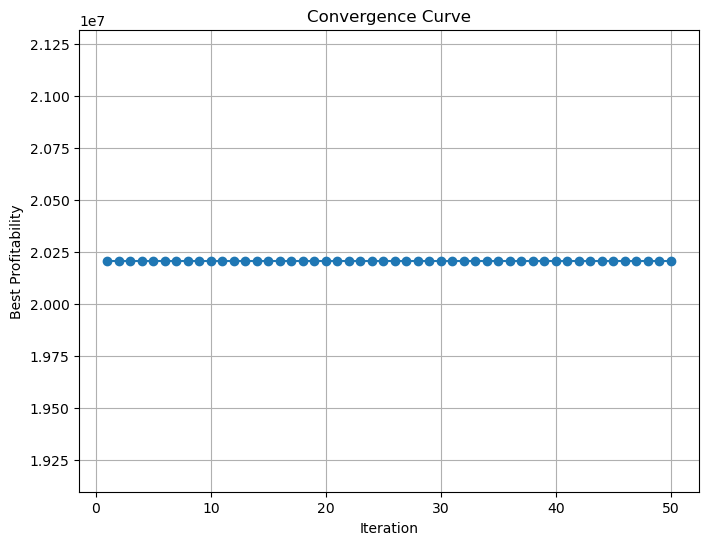

In [93]:
# Plot the convergence curve #use this
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 51), convergence_curve, marker='o', linestyle='-')
plt.title('Convergence Curve')
plt.xlabel('Iteration')
plt.ylabel('Best Profitability')
plt.grid(True)
plt.show()

In [94]:
# Compute R2 score
r2_de = r2_score(y, predicted_premiums_de_rf)
print("R-squared (R2) score of Hybrid DE-Random Forest model:", r2_de)

R-squared (R2) score of Hybrid DE-Random Forest model: 0.6447065080482282


In [95]:
from sklearn.metrics import mean_absolute_error

# Compute MAE
mae_de = mean_absolute_error(y, predicted_premiums_de_rf)
print("Mean Absolute Error (MAE) score of Hybrid DE-Random Forest model:", mae_de)

Mean Absolute Error (MAE) score of Hybrid DE-Random Forest model: 2750.060504306922


In [96]:
# Calculate Mean Squared Error
mse_de = mean_squared_error(y, predicted_premiums_de_rf)
print("Mean Squared Error(MSE) of Hybrid DE-RandomForest model:", mse_de)

Mean Squared Error(MSE) of Hybrid DE-RandomForest model: 13546647.052068368


In [97]:
# Calculate Root Mean Squared Error
rmse_de = mean_squared_error(y, predicted_premiums_de_rf, squared=False)
print("Root Mean Squared Error (RMSE) of Hybrid DE-RandomForest model:", rmse_de)

Root Mean Squared Error (RMSE) of Hybrid DE-RandomForest model: 3680.5769998830847


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
!pip install deap

gen	nevals	max         
0  	10    	-1.10012e+07
1  	10    	-1.10012e+07
2  	5     	-1.10012e+07
3  	0     	-1.10012e+07
4  	0     	-1.10012e+07
5  	9     	-1.10012e+07
6  	3     	-1.10012e+07
7  	9     	-1.10012e+07
8  	8     	-1.10012e+07
9  	6     	-1.10012e+07
10 	6     	-1.10012e+07
11 	2     	-1.10012e+07
12 	8     	-1.10012e+07
13 	9     	-1.10012e+07
14 	10    	-1.06596e+07
15 	5     	-1.06596e+07
16 	7     	-1.06596e+07
17 	8     	-1.06596e+07
18 	9     	-1.06596e+07
19 	7     	-1.06596e+07
20 	9     	-1.04863e+07
21 	7     	-1.02081e+07
22 	6     	-1.02081e+07
23 	2     	-1.02081e+07
24 	7     	-1.02081e+07
25 	8     	-1.02081e+07
26 	8     	-1.02081e+07
27 	7     	-1.02081e+07
28 	4     	-1.02081e+07
29 	5     	-1.02081e+07
30 	6     	-1.02081e+07
31 	9     	-1.02081e+07
32 	6     	-1.02081e+07
33 	8     	-1.02081e+07
34 	7     	-1.02081e+07
35 	9     	-1.02081e+07
36 	9     	-1.02081e+07
37 	7     	-1.02081e+07
38 	8     	-1.02081e+07
39 	8     	-1.02081e+07
40 	7     	-1.02

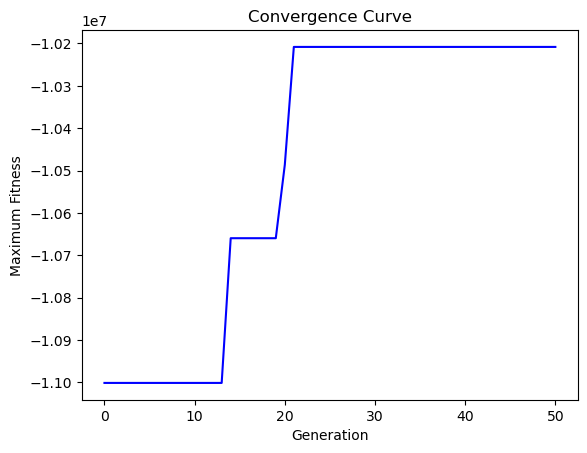

     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     Height  Weight  KnownA

In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import pickle
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

importance_scores = {
'Age': 0.6450,
'AnyTransplants': 0.0914,     
'NumberOfMajorSurgeries': 0.0482,
'AnyChronicDiseases':  0.0466,
'BloodPressureProblems': 0.0121,
'Weight': 0.1566
}


risk_factors = {
'Age':  5,
'AnyTransplants':  2,
 'AnyTransplants':  2,
'NumberOfMajorSurgeries':2,
'AnyChronicDiseases':  2,
'BloodPressureProblems': 1,
'Weight': 3
}

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define optimization problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def evaluate(individual):
    max_depth, min_samples_split, min_samples_leaf = individual

    # Train RandomForestRegressor with the rounded hyperparameters
    rf_model_for_ga = RandomForestRegressor(max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      random_state=42)
    rf_model_for_ga.fit(X_scaled, y)

    # Predict premiums using the RandomForestRegressor
    predicted_premiums_rf_for_ga = rf_model_for_ga.predict(X_scaled)

    # Calculate profitability (negative mean squared error)
    profitability = -mean_squared_error(y, predicted_premiums_rf_for_ga)

    # Adjust profitability based on risk factors
    adjusted_profitability = profitability

    for feature, importance_score in importance_scores.items():
        # Scale down importance score based on risk factor
        adjusted_importance_score = importance_score / risk_factors[feature]
        # If the feature has a higher risk factor, decrease the profitability
        adjusted_profitability -= np.sum(adjusted_importance_score * predicted_premiums_rf_for_ga)

    return adjusted_profitability,

toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 2, 11)  # Bounds for max_depth
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_int, toolbox.attr_int, toolbox.attr_int), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=2, up=10, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Create an initial population
population = toolbox.population(n=10)

# Variables to store convergence data
convergence_curve = []

# Define statistics to collect
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)

# Perform evolution
pop, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=stats, verbose=True)

# Extract convergence data
max_fitness_values = logbook.select("max")

# Plot convergence curve
plt.figure()
plt.plot(max_fitness_values, color='b', linestyle='-')
plt.xlabel('Generation')
plt.ylabel('Maximum Fitness')
plt.title('Convergence Curve')
plt.show()

# Get the best individual
best_individual = tools.selBest(pop, k=1)[0]
best_max_depth, best_min_samples_split, best_min_samples_leaf = best_individual

# Train RandomForestRegressor with the best hyperparameters
optimized_ga_rf_model = RandomForestRegressor(max_depth=best_max_depth,
                                            min_samples_split=best_min_samples_split,
                                            min_samples_leaf=best_min_samples_leaf,
                                            random_state=42)
optimized_ga_rf_model.fit(X_scaled, y)

# Predict premiums using the optimized RandomForestRegressor on entire dataset
predicted_premiums_ga_rf = optimized_ga_rf_model.predict(X_scaled)

# Save the new RandomForestRegressor model using pickle
with open('optimized_ga_rf_model_bmi.pkl', 'wb') as f:
    pickle.dump(optimized_ga_rf_model, f)

# Integrate predicted premiums into the original DataFrame
health_df_nooutliers['Predicted Premium (Optimized GA RF Model)'] = predicted_premiums_ga_rf

# Display the updated DataFrame
print(health_df_nooutliers)


In [88]:
# Compute R2 score
r2_ga = r2_score(y, predicted_premiums_ga_rf)
print("R-squared (R2) score of GA Optimized RF model:", r2_ga)

R-squared (R2) score of GA Optimized RF model: 0.9070736225948489


In [89]:
from sklearn.metrics import mean_absolute_error

# Compute MAE
mae_ga = mean_absolute_error(y, predicted_premiums_ga_rf)
print("Mean Absolute Error (MAE) score of GA Optimized RF model:", mae_ga)

Mean Absolute Error (MAE) score of GA Optimized RF model: 815.9967436796777


In [90]:
# Calculate Mean Squared Error
mse_ga = mean_squared_error(y, predicted_premiums_ga_rf)
print("Mean Squared Error(MSE) of Hybrid GA-RandomForest model:", mse_ga)

Mean Squared Error(MSE) of Hybrid GA-RandomForest model: 3543101.30934163


In [91]:
# Calculate Root Mean Squared Error
rmse_ga = mean_squared_error(y, predicted_premiums_ga_rf, squared=False)
print("Root Mean Squared Error (RMSE) of Hybrid GA-RandomForest model:", rmse_ga)

Root Mean Squared Error (RMSE) of Hybrid GA-RandomForest model: 1882.31275545315


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [98]:
import pandas as pd

# Create lists or arrays to store the evaluation metrics for each model
model_names = ["PSO", "DE", "GA"]
mae_scores = [mae_pso, mae_de, mae_ga]
mse_scores = [mse_pso, mse_de, mse_ga]
rmse_scores = [rmse_pso, rmse_de, rmse_ga]
r2_scores = [r2_pso, r2_de, r2_ga]


# Create a DataFrame
nioa_metrics_df = pd.DataFrame({
    "Model": model_names,
    "MAE": mae_scores,
    "MSE": mse_scores,
    "RMSE": rmse_scores,
    "R-squared": r2_scores
})


# Sort the DataFrame by the "R-squared" column in ascending order
sorted_metrics_df = nioa_metrics_df.sort_values(by="R-squared")

# Display the sorted table
print(sorted_metrics_df)


  Model          MAE           MSE         RMSE  R-squared
1    DE  2750.060504  1.354665e+07  3680.577000   0.644707
0   PSO  1977.265258  1.015806e+07  3187.170514   0.733580
2    GA   815.996744  3.543101e+06  1882.312755   0.907074


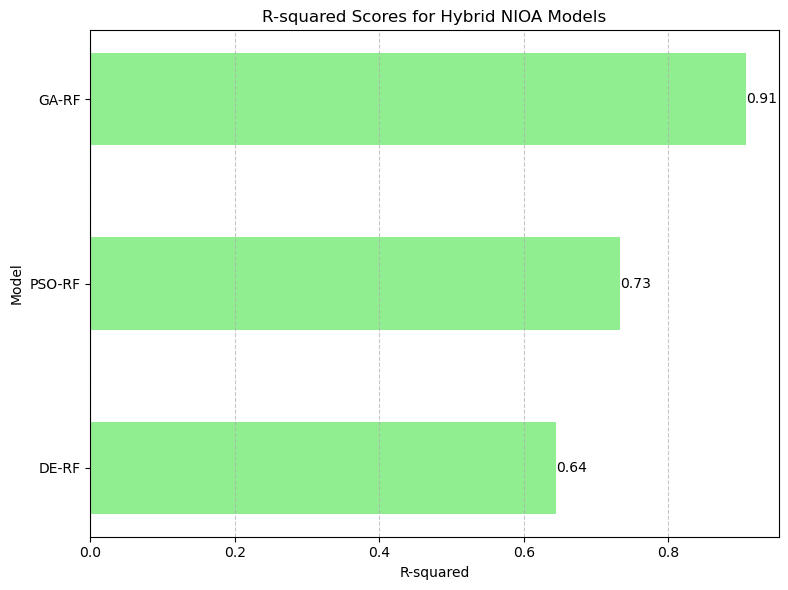

In [99]:
import matplotlib.pyplot as plt

# Data
model_names = ["PSO-RF", "DE-RF", "GA-RF"]
r2_scores = [r2_pso, r2_de, r2_ga]

# Create a DataFrame
nioa_metrics_r2_df = pd.DataFrame({
    "Model": model_names,
    "R-squared": r2_scores
})

# Sort the DataFrame by the "R-squared" column in ascending order
sorted_metrics_r2_df = nioa_metrics_r2_df.sort_values(by="R-squared")

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(sorted_metrics_r2_df["Model"], sorted_metrics_r2_df["R-squared"],height=0.5, color='lightgreen')
plt.xlabel('R-squared')
plt.ylabel('Model')
plt.title('R-squared Scores for Hybrid NIOA Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add the scores next to the bars
for bar, score in zip(bars, sorted_metrics_r2_df["R-squared"]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [100]:
# Create lists or arrays to store the evaluation metrics for each model
model_names = ["PSO", "DE", "GA"]
r2_scores = [r2_pso, r2_de, r2_ga]


# Create a DataFrame
nioa_metrics_r2_df = pd.DataFrame({
    "Model": model_names,
    "R-squared": r2_scores
})

# Sort the DataFrame by the "R-squared" column in ascending order
sorted_metrics_r2_df = nioa_metrics_r2_df.sort_values(by="R-squared")

# Display the sorted table
print(sorted_metrics_r2_df)


  Model  R-squared
1    DE   0.644707
0   PSO   0.733580
2    GA   0.907074


In [107]:
import pandas as pd

# Create lists or arrays to store the evaluation metrics for each model
model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree", "Random Forest", "Gradient Boosting","LightGBM", "XGBoost Regression", "KNN", "Catboost","PSO-RF", "DE-RF", "GA-RF"]
mae_scores = [mae_linear, mae_lasso, mae_ridge, mae_tree, mae_forest, mae_gbm, mae_lgbm, mae_xgb, mae_knn, mae_catboost, mae_pso, mae_de, mae_ga]
mse_scores = [mse_linear, mse_lasso, mse_ridge, mse_tree, mse_forest, mse_gbm, mse_lgbm, mse_xgb, mse_knn, mse_catboost,mse_pso, mse_de, mse_ga ]
rmse_scores = [rmse_linear, rmse_lasso, rmse_ridge, rmse_tree, rmse_forest, rmse_gbm, rmse_lgbm, rmse_xgb, rmse_knn, rmse_catboost,rmse_pso, rmse_de, rmse_ga]
r2_scores = [r2_linear, r2_lasso, r2_ridge, r2_tree, r2_forest, r2_gbm, r2_lgbm, r2_xgb, r2_knn, r2_catboost,r2_pso, r2_de, r2_ga]


# Create a DataFrame
metrics_updated_df = pd.DataFrame({
    "Model": model_names,
    "MAE": mae_scores,
    "MSE": mse_scores,
    "RMSE": rmse_scores,
    "R-squared": r2_scores
})


# Sort the DataFrame by the "R-squared" column in ascending order
sorted_updated_metrics_df = metrics_updated_df.sort_values(by="R-squared")

# Display the sorted table
print(sorted_updated_metrics_df)


                 Model          MAE           MSE         RMSE  R-squared
3        Decision Tree  1707.112971  2.517155e+07  5017.125483   0.347631
1     Lasso Regression  2984.886922  1.762185e+07  4197.839318   0.543296
0    Linear Regression  2985.083117  1.761914e+07  4197.515443   0.543366
2     Ridge Regression  2984.862272  1.761442e+07  4196.953133   0.543489
8                  KNN  2303.765690  1.585188e+07  3981.442307   0.589168
5    Gradient Boosting  1860.641389  1.480609e+07  3847.867723   0.616272
7   XGBoost Regression  1860.641389  1.480609e+07  3847.867723   0.616272
11               DE-RF  2750.060504  1.354665e+07  3680.577000   0.644707
9             Catboost  1922.327584  1.297124e+07  3601.561102   0.663825
4        Random Forest  1439.874477  1.226261e+07  3501.800672   0.682191
6             LightGBM  1761.001431  1.154644e+07  3398.005630   0.700752
10              PSO-RF  1977.265258  1.015806e+07  3187.170514   0.733580
12               GA-RF   815.996744  3

### Benchmarking

In [102]:
import pandas as pd

# Assuming you have collected the necessary metrics for both models
# Let's say you have variables: r2_ga_rf, mse_ga_rf, mae_ga_rf, r2_rf, mse_rf, mae_rf

# Create lists of metrics for both models
models = ['With NIOA', 'Without NIOA']
r2_scores = [r2_ga, r2_forest]
mse_scores = [mse_ga, mse_forest]
mae_scores = [mae_ga, mae_forest]
rmse_scores = [rmse_ga, rmse_forest]

# Create a DataFrame
data = {
    'Model': models,
    'R2 Score': r2_scores,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'RMSE': rmse_scores
}

df = pd.DataFrame(data)

df.head()


,Model,R2 Score,MSE,MAE,RMSE
0,With NIOA,0.907074,3.543101e+06,815.996744,1882.312755
1,Without NIOA,0.682191,1.226261e+07,1439.874477,3501.800672


In [103]:
print(health_df_nooutliers)

     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     Height  Weight  KnownA

In [104]:
# Define the new order of columns
new_order = ['Age','Diabetes', 'BloodPressureProblems','AnyTransplants','AnyChronicDiseases','Height','Weight',
             'KnownAllergies', 'HistoryOfCancerInFamily','NumberOfMajorSurgeries', 'PremiumPrice', 
             'Predicted Premium (Optimized PSO RF)', 'Predicted Premium (Optimized DE RF)',
             'Predicted Premium (Optimized GA RF Model)' ]# Specify the desired order of columns

# Reorder the columns in the DataFrame
health_updated_df = health_df_nooutliers[new_order]

In [105]:
health_updated_df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Predicted Premium (Optimized PSO RF),Predicted Premium (Optimized DE RF),Predicted Premium (Optimized GA RF Model)
0,45,0,0,0,0,1.55,57,0,0,0,25000,24428.650389,26174.767325,24374.953257
1,60,1,0,0,0,1.80,73,0,0,0,29000,28142.963717,26486.394626,29138.337802
2,36,1,1,0,0,1.58,59,0,0,1,23000,24171.295781,26129.294412,23757.989983
3,52,1,1,0,1,1.83,93,0,0,2,28000,28142.963717,26486.394626,28914.222222
4,38,0,0,0,1,1.66,88,0,0,1,23000,24171.295781,26129.294412,24392.253866


In [106]:
health_updated_df.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Predicted Premium (Optimized PSO RF),Predicted Premium (Optimized DE RF),Predicted Premium (Optimized GA RF Model)
981,18,0,0,0,0,1.69,67,0,0,0,15000,15809.739192,15766.588660,17506.547619
982,64,1,1,0,0,1.53,70,0,0,3,28000,28142.963717,26486.394626,28000.000000
983,56,0,1,0,0,1.55,71,0,0,1,29000,28142.963717,26486.394626,29330.198229
984,47,1,1,0,0,1.58,73,1,0,1,39000,27826.797868,26447.517101,28926.375204
985,21,0,0,0,0,1.58,75,1,0,1,15000,15461.951243,15766.588660,15098.000000
